<a align="left" href="https://ultralytics.com/yolov5" target="_blank">
<img width="1024", src="https://user-images.githubusercontent.com/26833433/125273437-35b3fc00-e30d-11eb-9079-46f313325424.png"></a>

This custom Jupyter Notebook has been used in Google Colab (https://colab.research.google.com/) and is used to run all of the commands and acces all of the files necessary to train a YOLOv5 model on our custom lego dataset. 

Only this file and acces to my personal Google Drive is necessary to run everything. The rest of the data is gathered from my personal GitHub.

The entire aim of this code is to be able to detect lego bricks from images or videos.
At the end we will be able to detect and distinguish the following lego bricks: 

    brick 2x4,
    plate 2x2,
    plate 1x2,
    plate 2x4,
    brick 1x6 &
    brick 2x2

I might even use this code and improve upon it in the future to make an automatic lego sorting machine :P

Disclaimer: This custom Jupyter Notebook has been based on the **official YOLOv5 🚀 notebook** by **Ultralytics**, and is freely available for redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/). 
For more information please visit https://github.com/ultralytics/yolov5 and https://ultralytics.com. Thank you!

# Setup

The YOLOv5 model, custom configuration files and custom test files are stored on my personal GitHub. We will clone the repository, define our default directory, install the needed dependencies and check PyTorch and the GPU.

In [1]:
# Clone GitHub repository
!git clone https://github.com/483172/yolov5-custom_lego_dataset-2022-06-15
# Define default directory
%cd yolov5-custom_lego_dataset-2022-06-15
# Install all necessary dependencies
%pip install -qr requirements.txt

# Check PyTorch
import torch
# Check the GPU
import utils
display = utils.notebook_init()

YOLOv5 🚀 43bd979 Python-3.7.13 torch-1.11.0+cu113 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.8/107.7 GB disk)


The custom lego dataset is stored on my personal Google Drive. To be able to acces and use it for training, we need to attach the drive.

Note: Only needed for the specified training.

In [2]:
# Attach dataset directory  (optional)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Train

<p align=""><a href=""><img width="1000" src="https://uploads-ssl.webflow.com/5f6bc60e665f54545a1e52a5/615627e5824c9c6195abfda9_computer-vision-cycle.png"/></a></p>

Note: Monotoring our training run can be done with the help of Tensorbard or Weights & Biases. Both of them dont create any information that can't be found, but help with an easy overview.

In [ ]:
# Tensorboard  (optional)
%load_ext tensorboard
%tensorboard --logdir runs/train

In [ ]:
# Weights & Biases  (optional)
%pip install -q wandb
import wandb
wandb.login()

     |████████████████████████████████| 1.8 MB 27.0 MB/s 
     |████████████████████████████████| 145 kB 68.3 MB/s 
     |████████████████████████████████| 181 kB 54.0 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

Now we will train our custom YOLOv5 model. We will use the pretrained YOLOv5m model as a starting point for our training and train it with the custom lego dataset (the most recent version of the pretrained YOLOv5m model is automatically downloaded from GitHub). <- **Pretrained [Models](https://github.com/ultralytics/yolov5/tree/master/models)** are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases)

We will run a total of 16 images each batch and 50 epochs in total to train our custom YOLOv5 model (create our 'weights' file). <- **Training Results** are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.

Note: These parameters have been based on multiple runs and a GitHub refrence: https://github.com/ultralytics/yolov5/issues/6507

In [ ]:
# Dataset to use for training is declared as `--data coco128.yaml`
# Using a pretrained model to start training is declared as `--weights yolov5s.pt`
# Using a randomly initialized model to start training is declared as `--weights '' --cfg yolov5s.yaml`.

# Train our custom YOLOv5 model, starting with the pretrained YOLOv5m model and trained on the custom lego dataset
!python train.py --img 640 --batch 16 --epochs 50 --data custom_lego_dataset.yaml --weights yolov5m.pt --cache

wandb: Currently logged in as: 483172. Use `wandb login --relogin` to force relogin
train: weights=yolov5m.pt, cfg=, data=custom_lego_dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
fatal: ambiguous argument 'main..origin/master': unknown revision or path not in the working tree.
Use '--' to separate paths from revisions, like this:
'git <command> [<revision>...] -- [<file>...]'
Command 'git rev-list main..origin/master --count' returned non-zero exit status 128.
YOLOv5 🚀 6298e96 Python-3.7.13 torch-1.

From the output of our training we can already see it has done a pretty decent job. But to visualize it in graphs we can show the summary it has created.

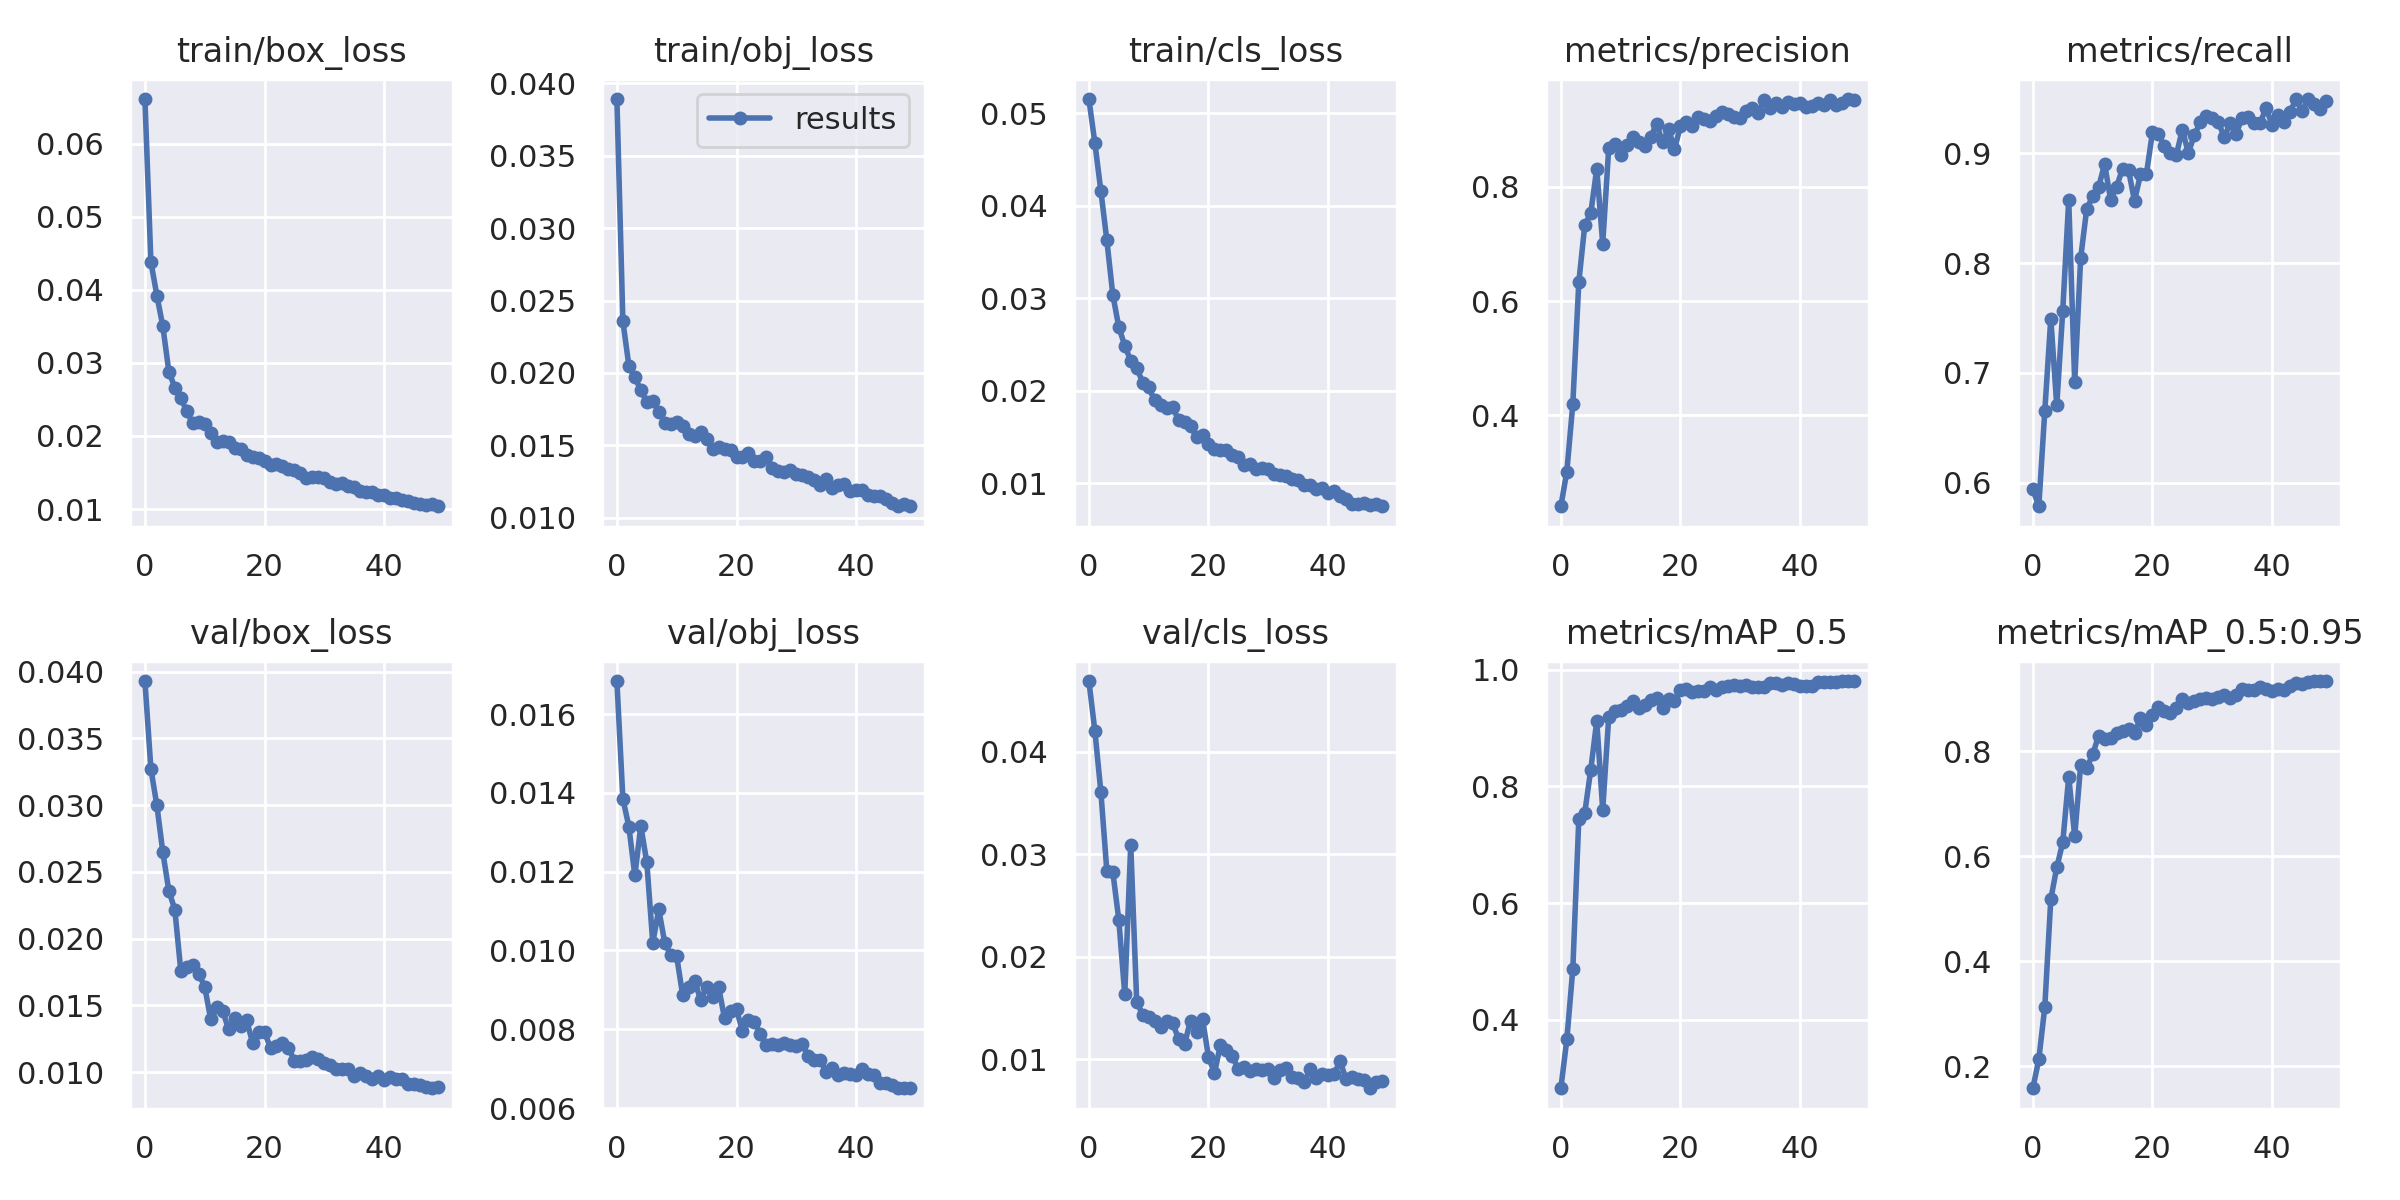

In [3]:
# Show the training summary
display.Image(filename='runs/train/exp/results.png', width=1000)

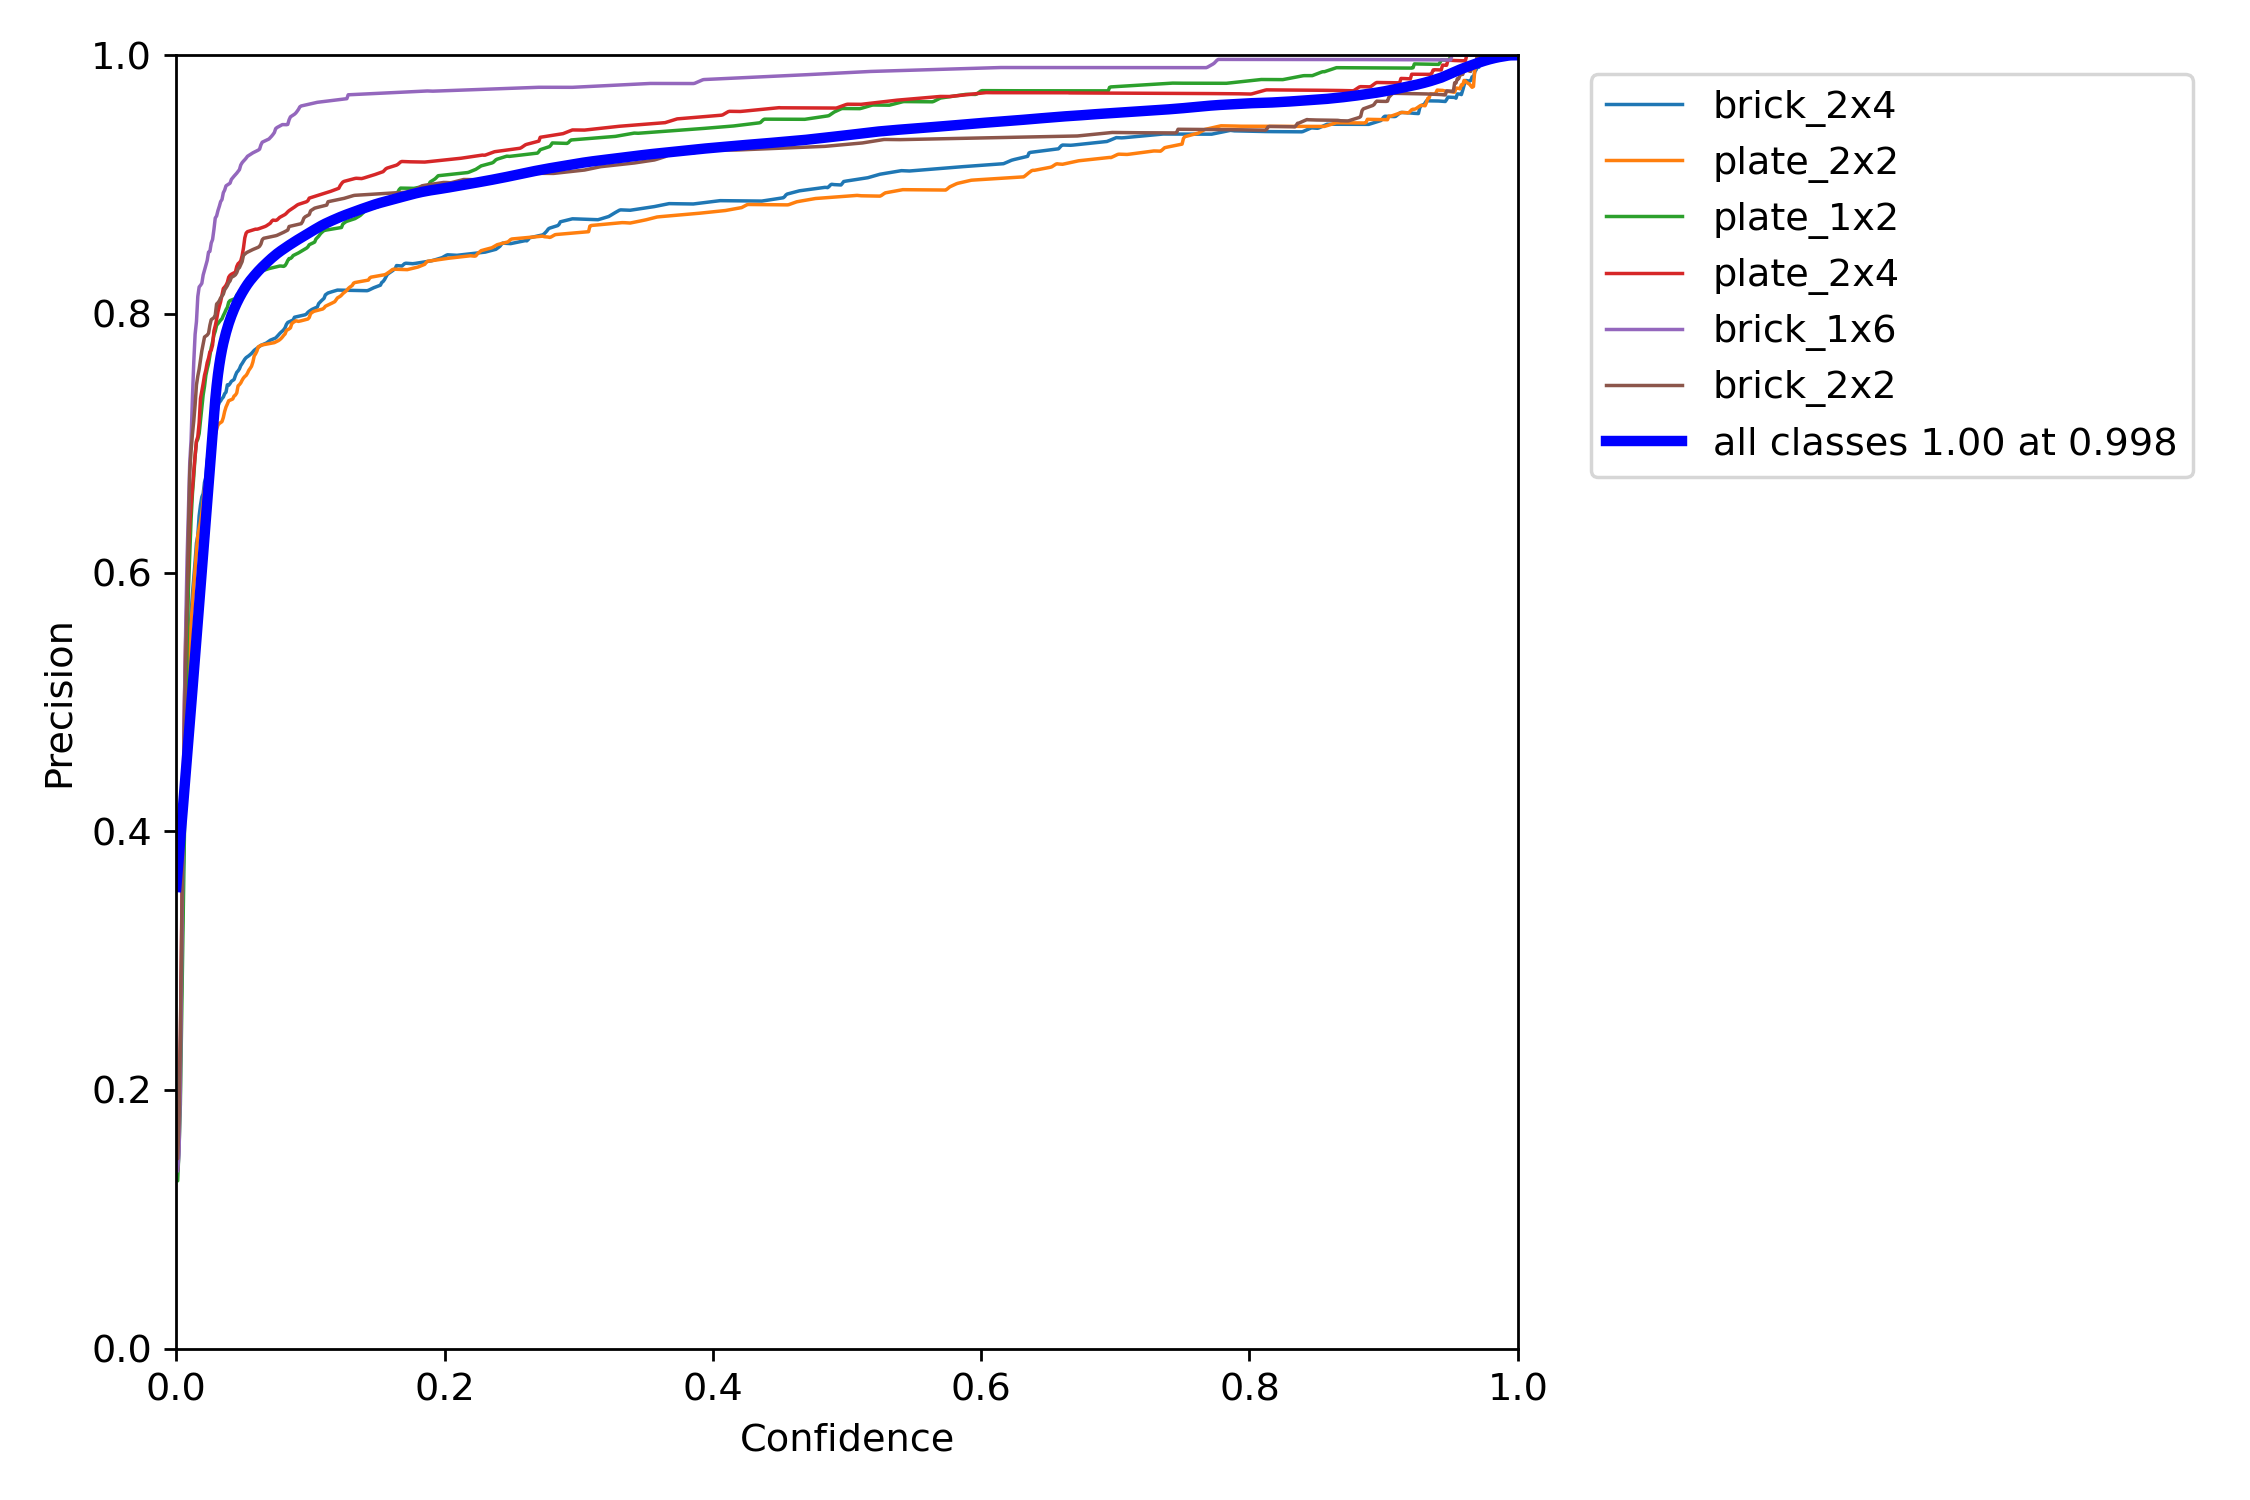

In [4]:
display.Image(filename='runs/train/exp/P_curve.png', width=1000)

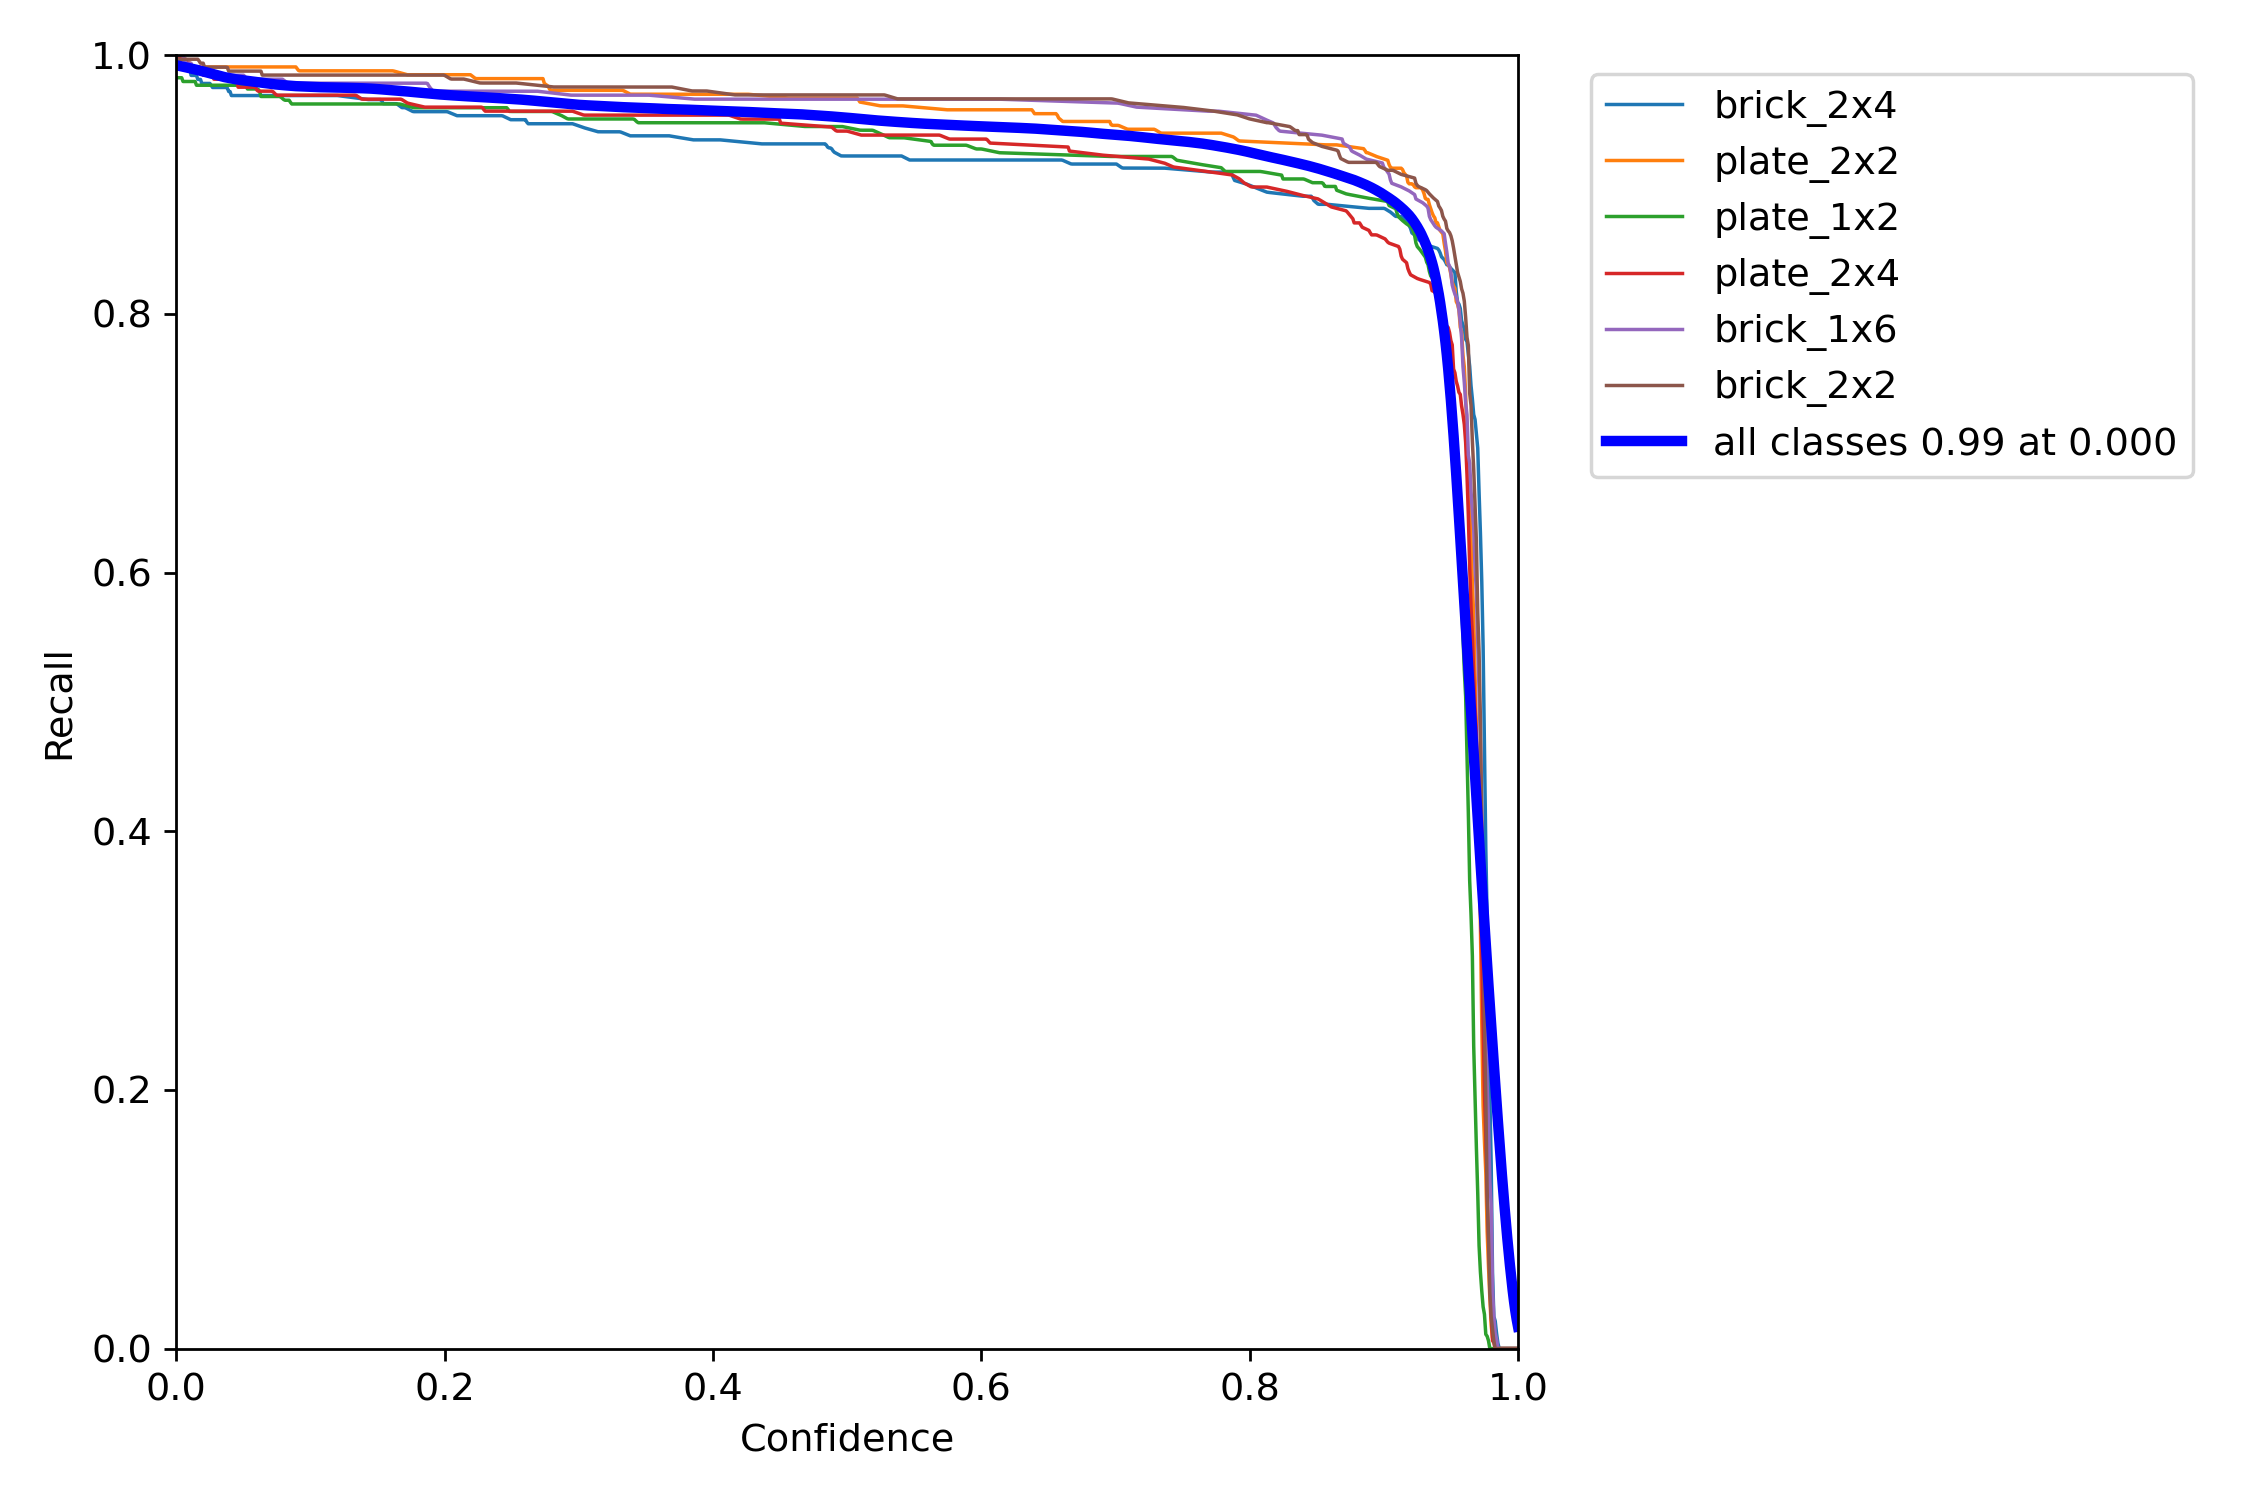

In [5]:
display.Image(filename='runs/train/exp/R_curve.png', width=1000)

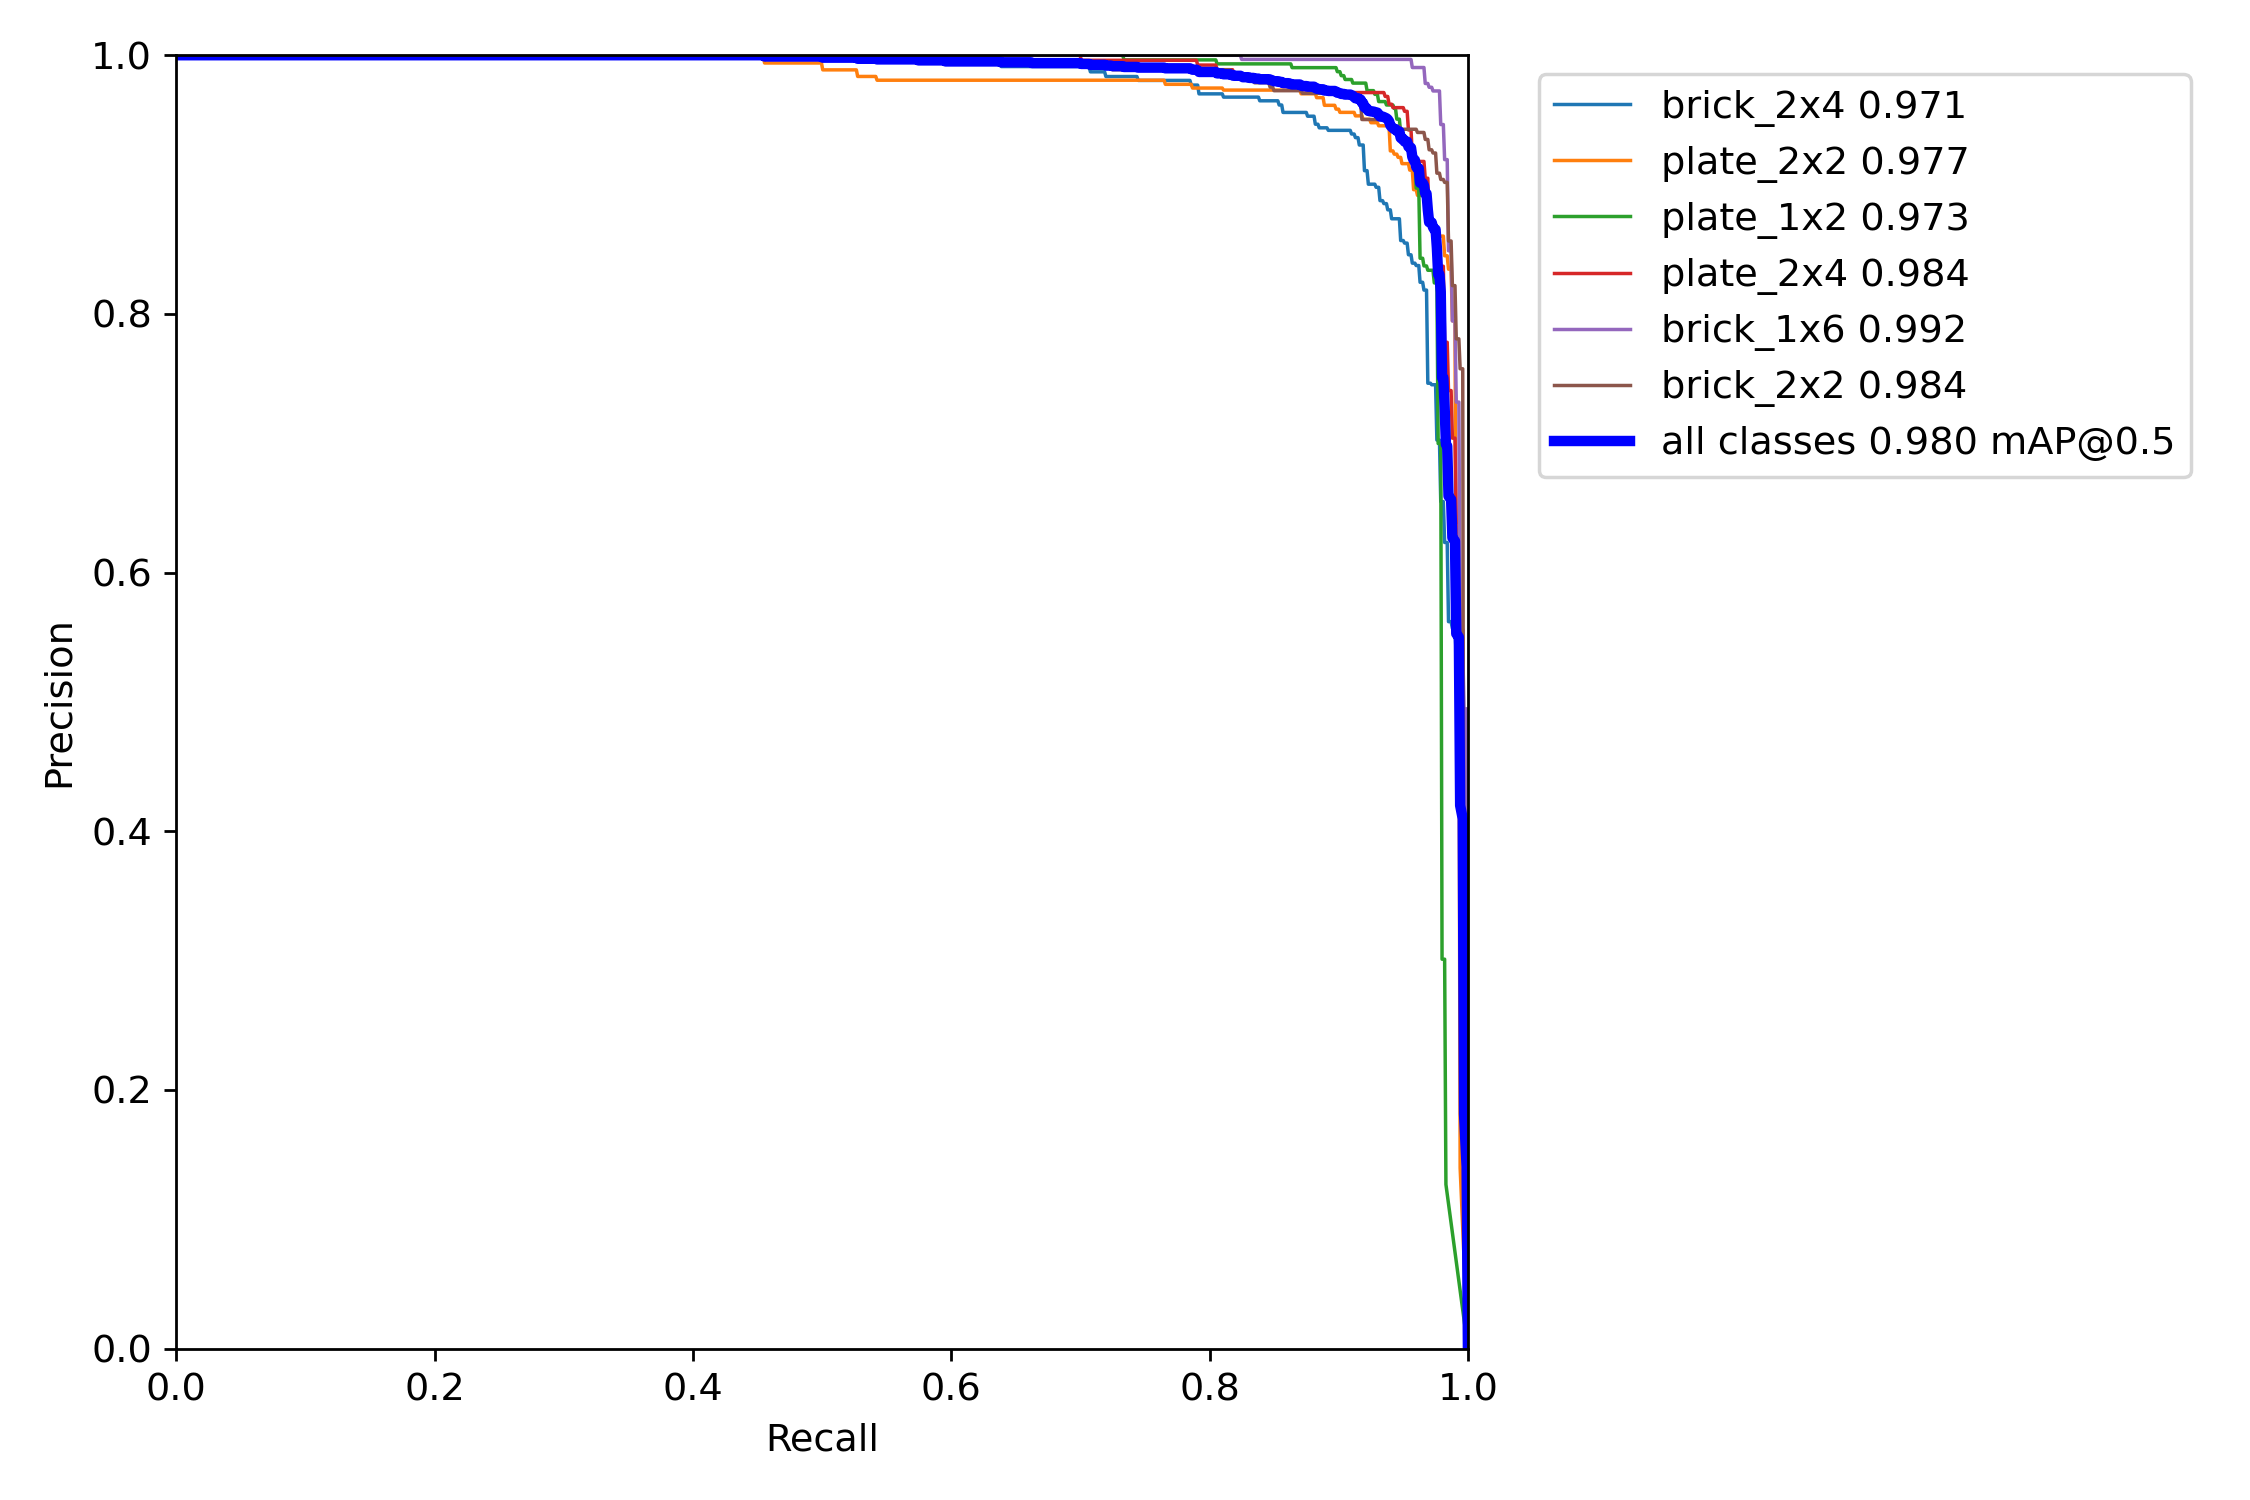

In [6]:
display.Image(filename='runs/train/exp/PR_curve.png', width=1000)

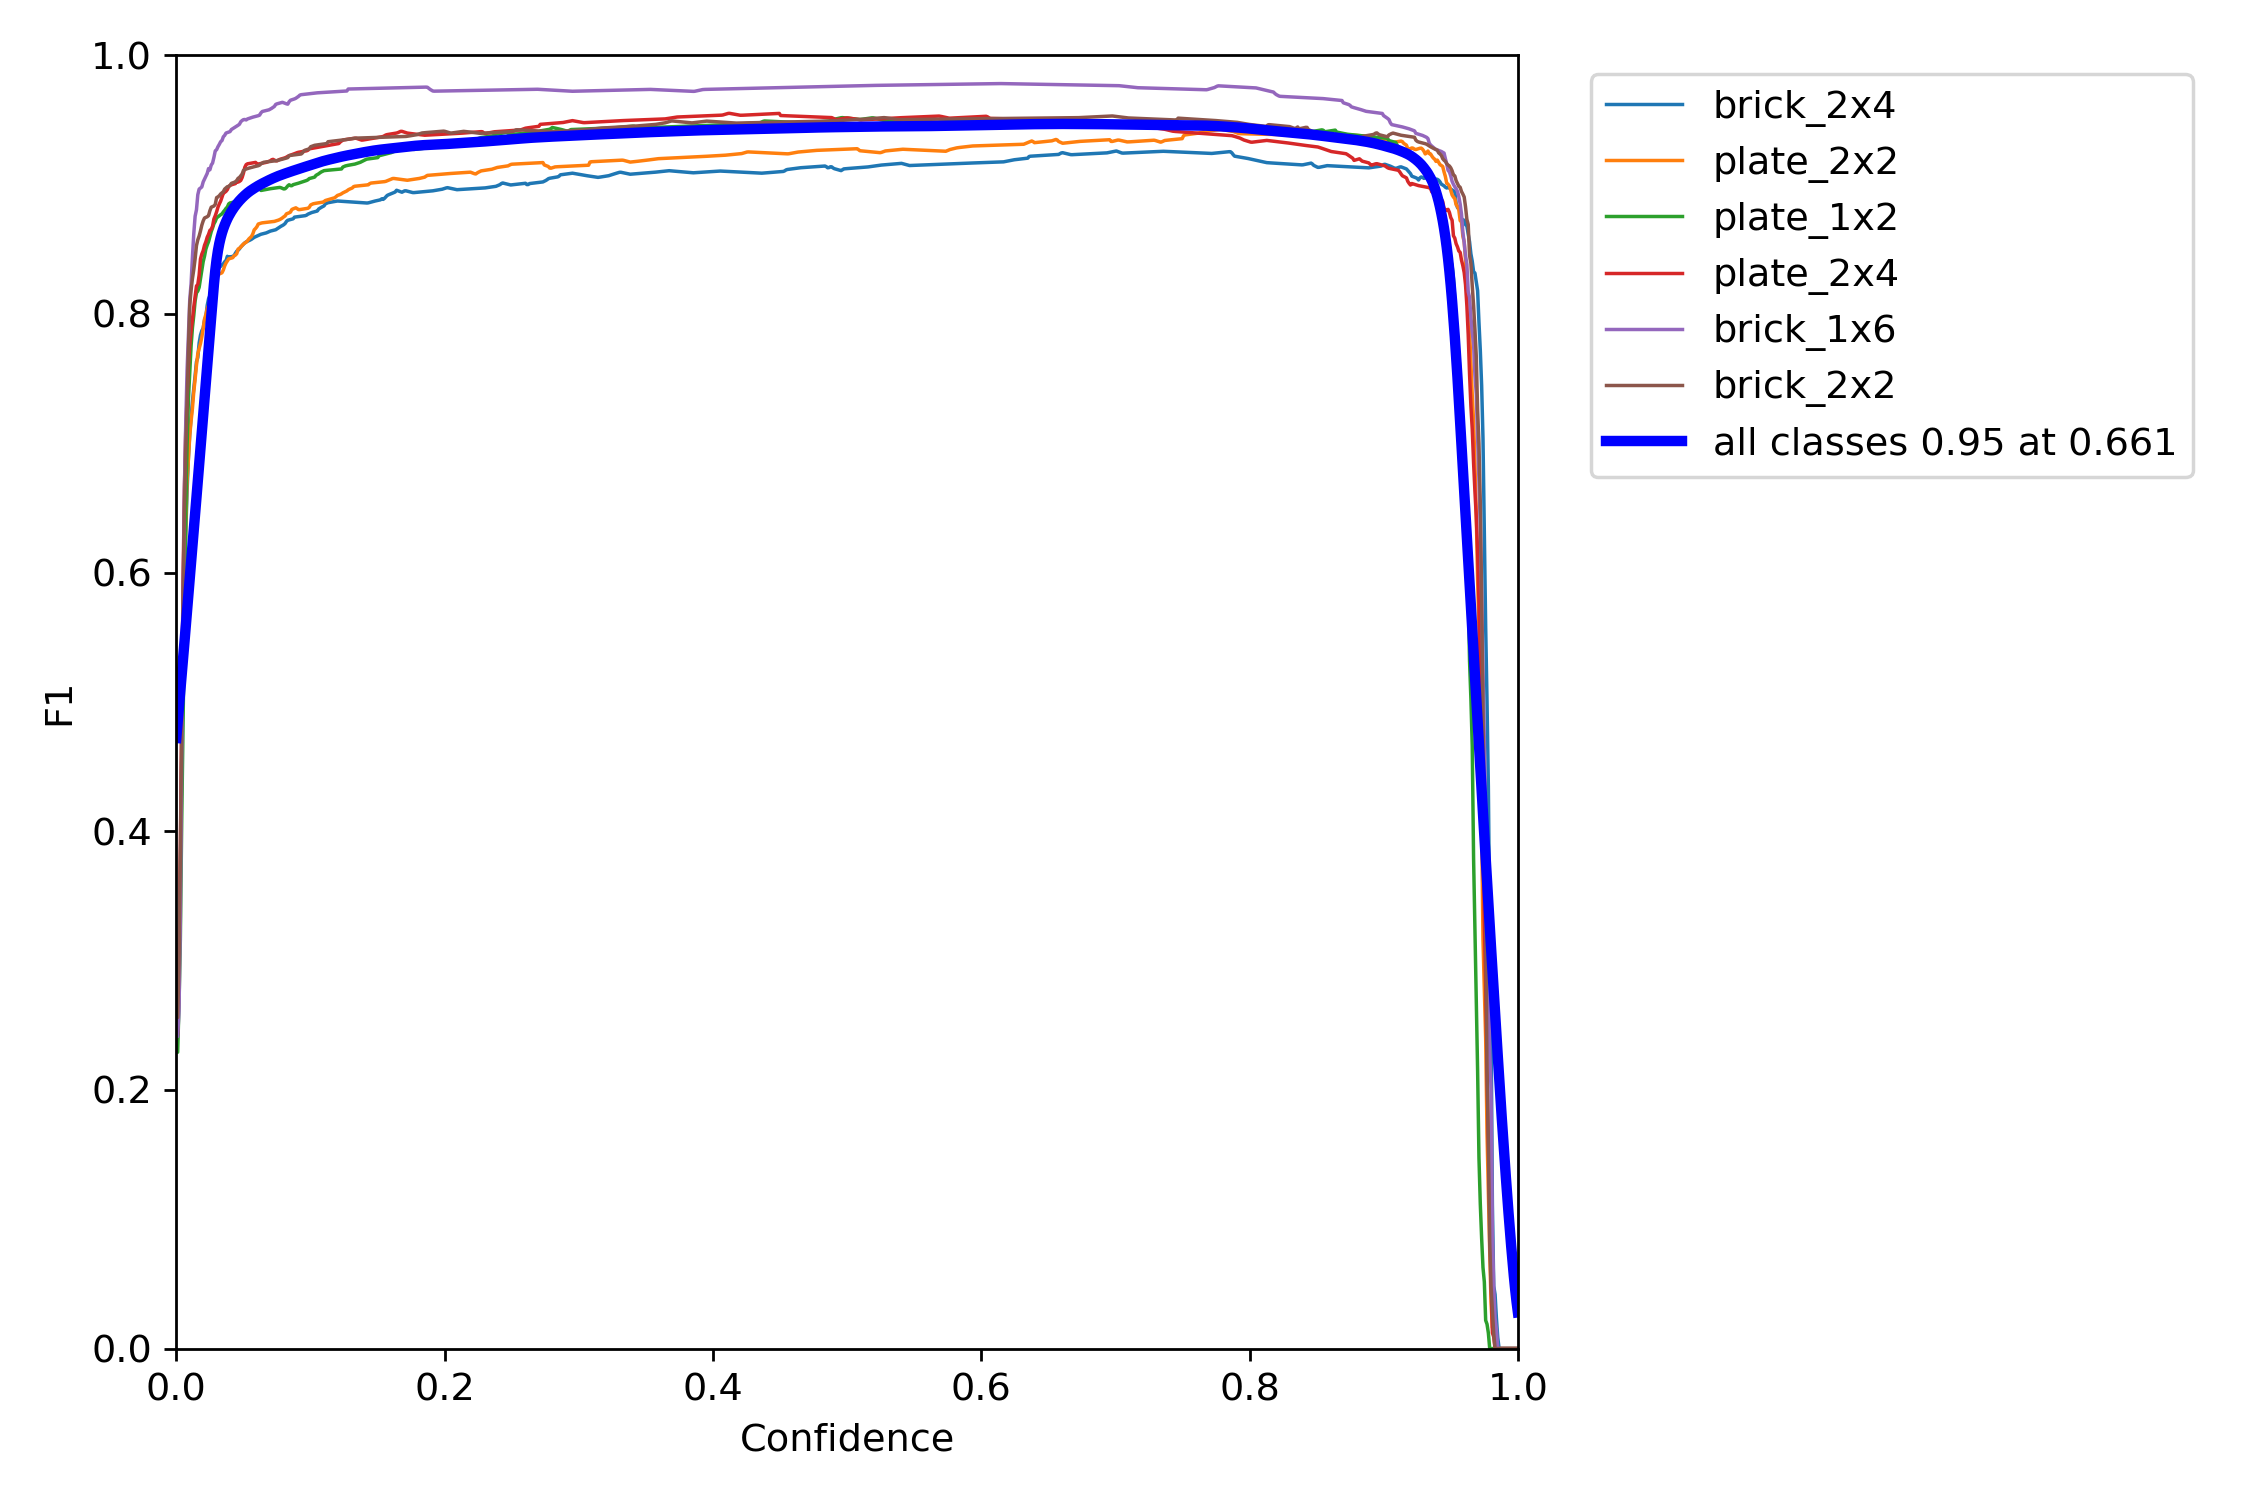

In [7]:
display.Image(filename='runs/train/exp/F1_curve.png', width=1000)

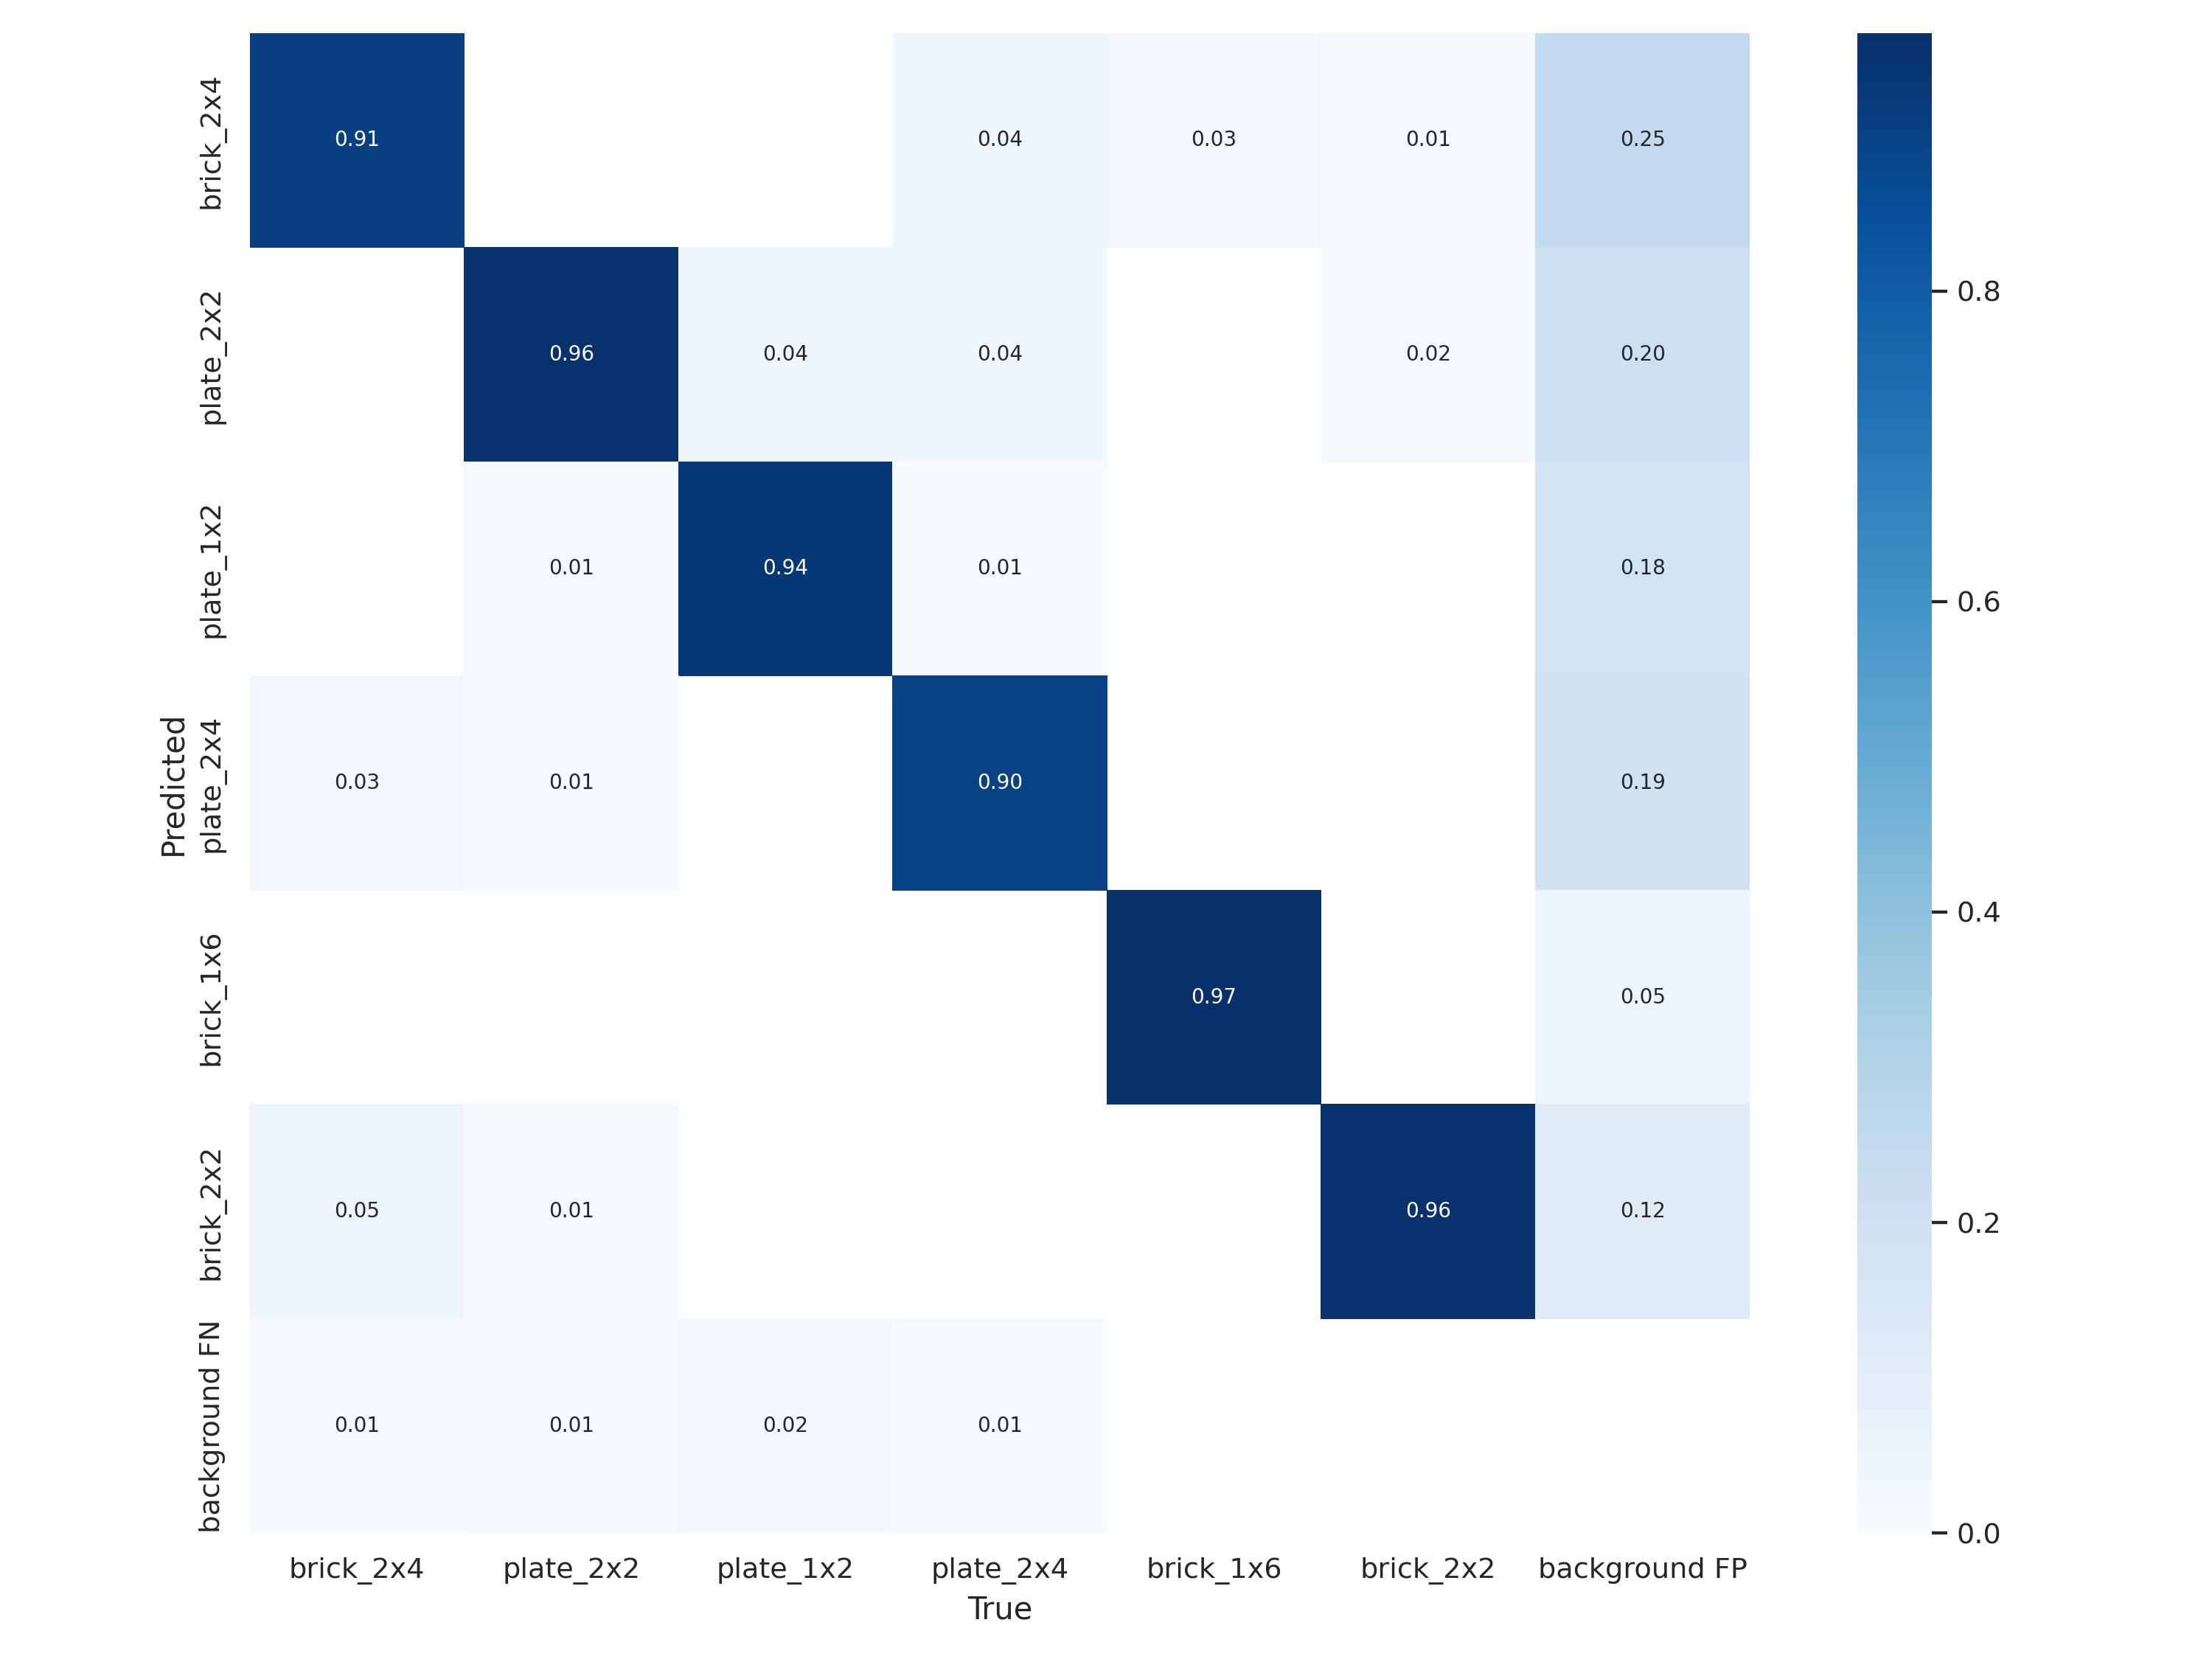

In [8]:
display.Image(filename='runs/train/exp/confusion_matrix.png', width=1000)

Ofcourse we want to see how it has actually done. Lets show some prediction results.

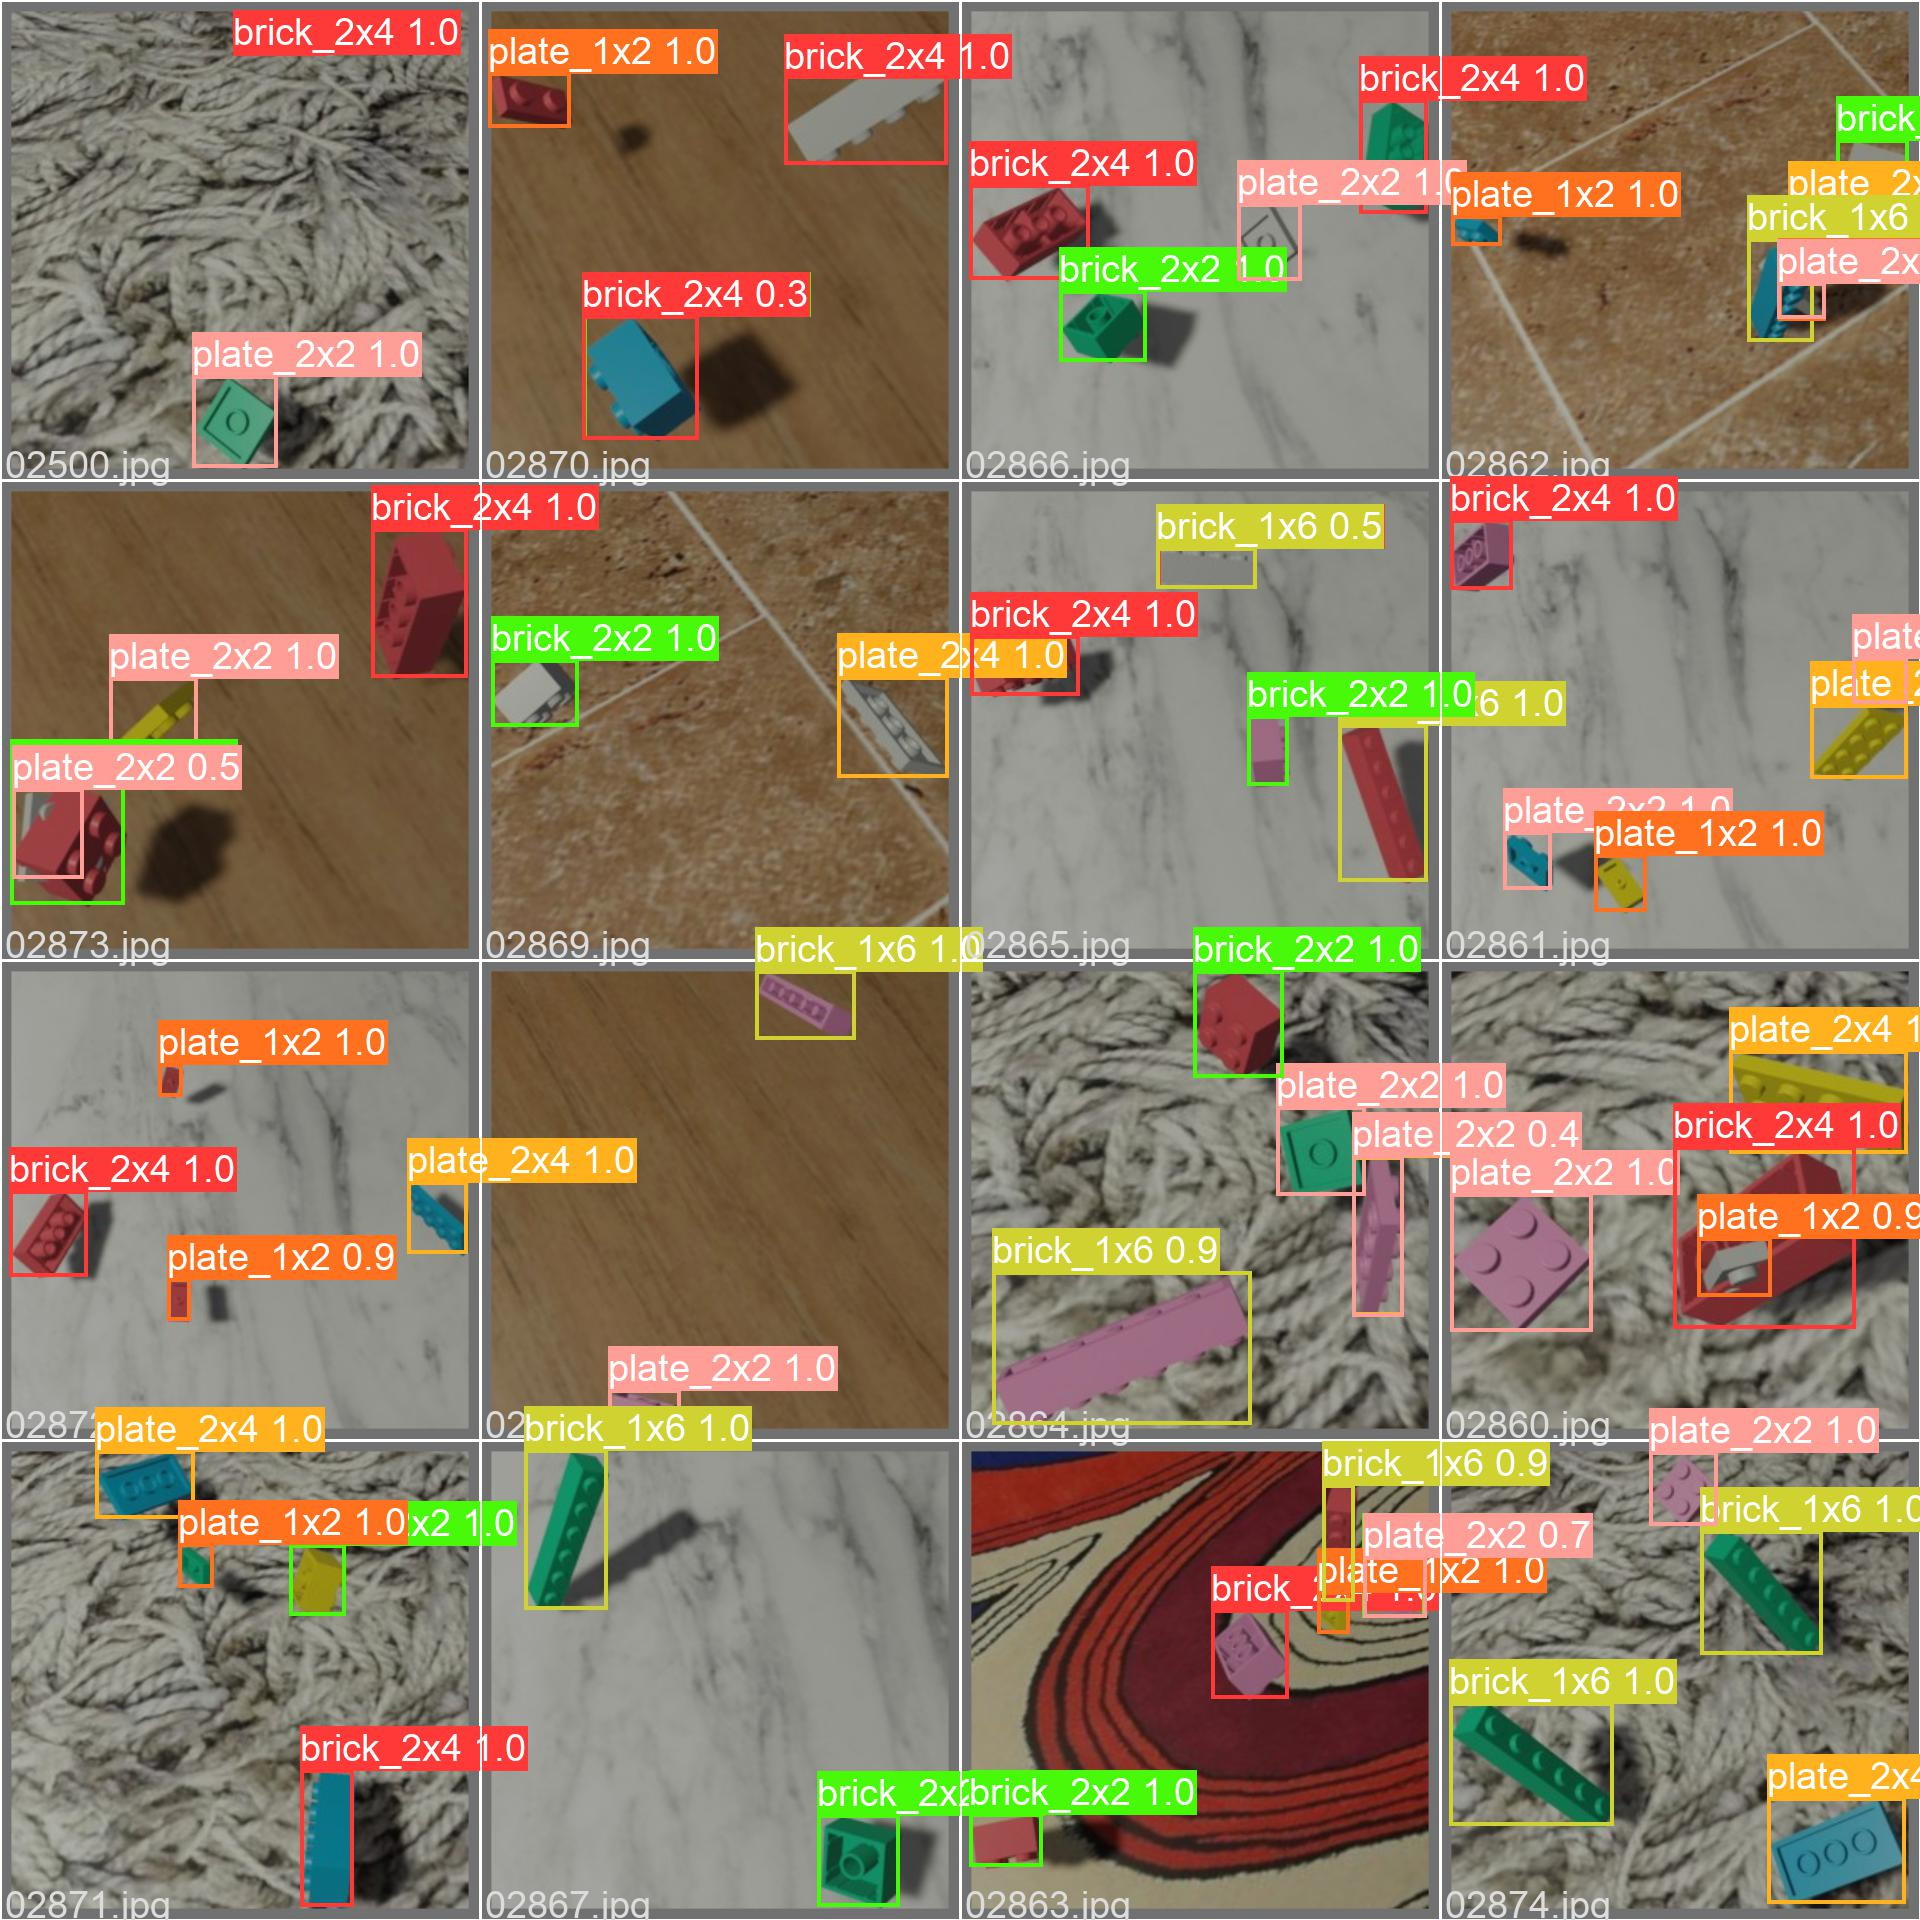

In [9]:
# Show the prediction results
display.Image(filename='runs/train/exp/val_batch0_pred.jpg', width=1000)

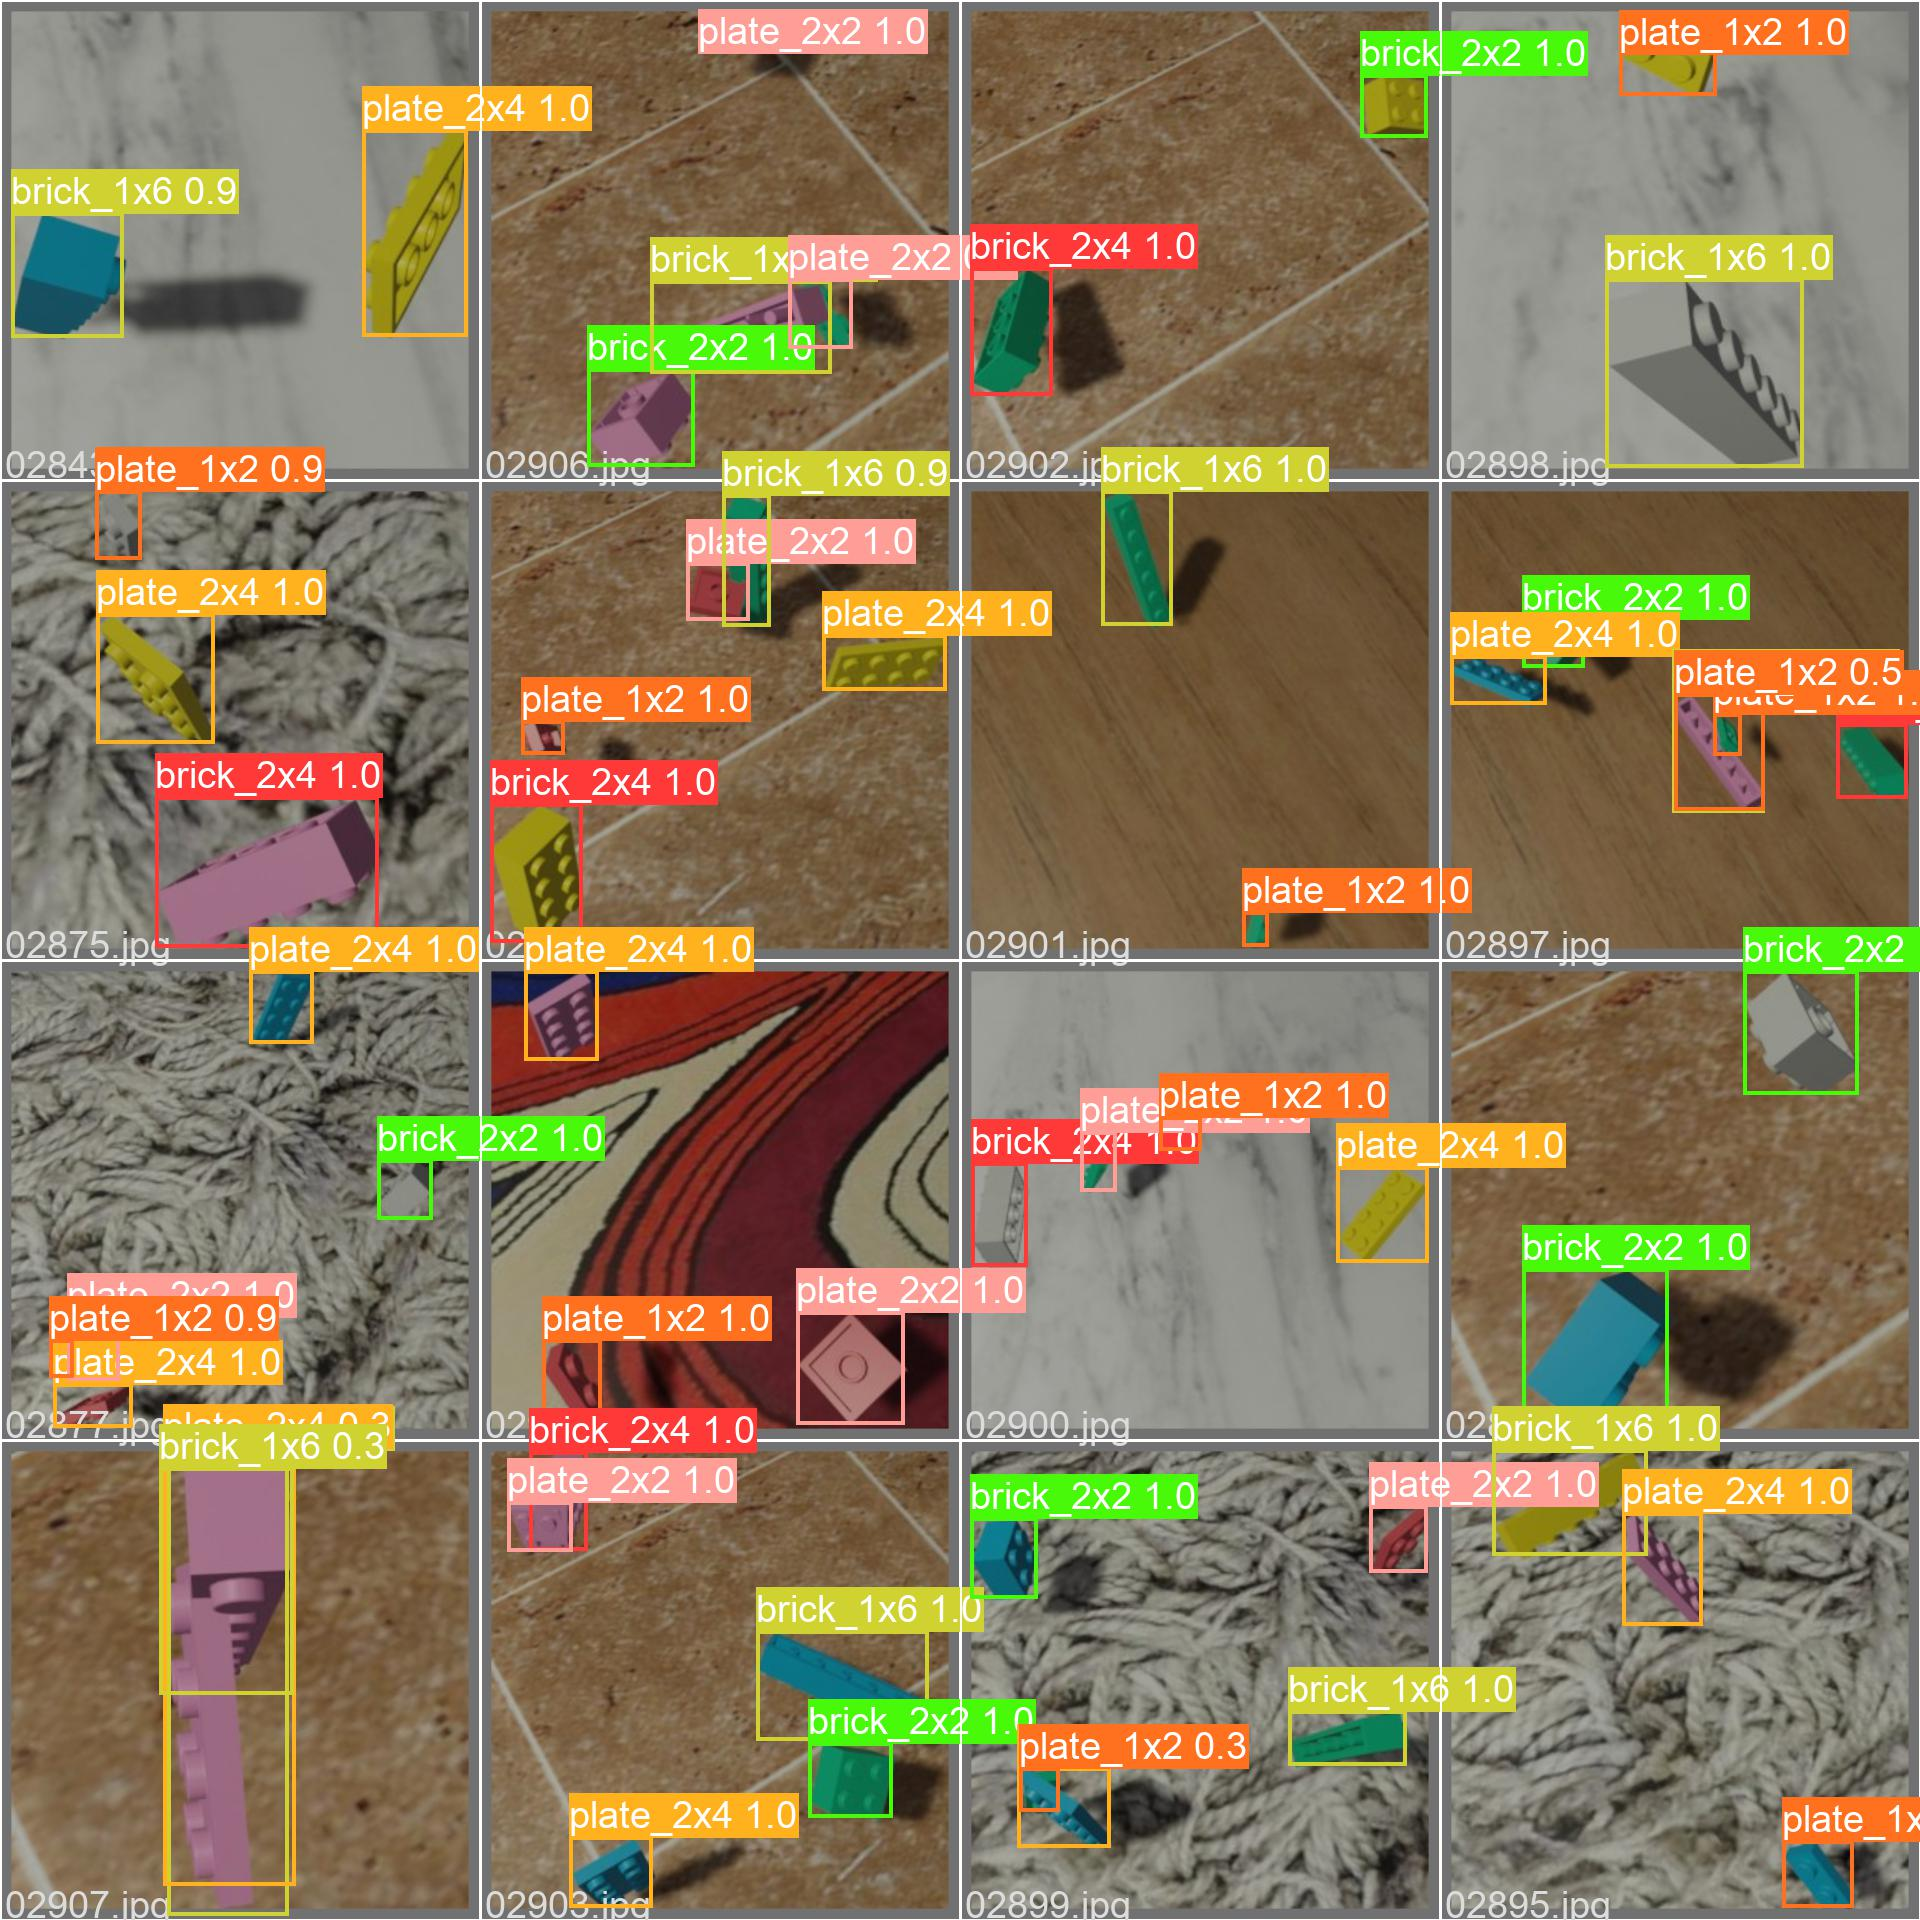

In [10]:
display.Image(filename='runs/train/exp/val_batch1_pred.jpg', width=1000)

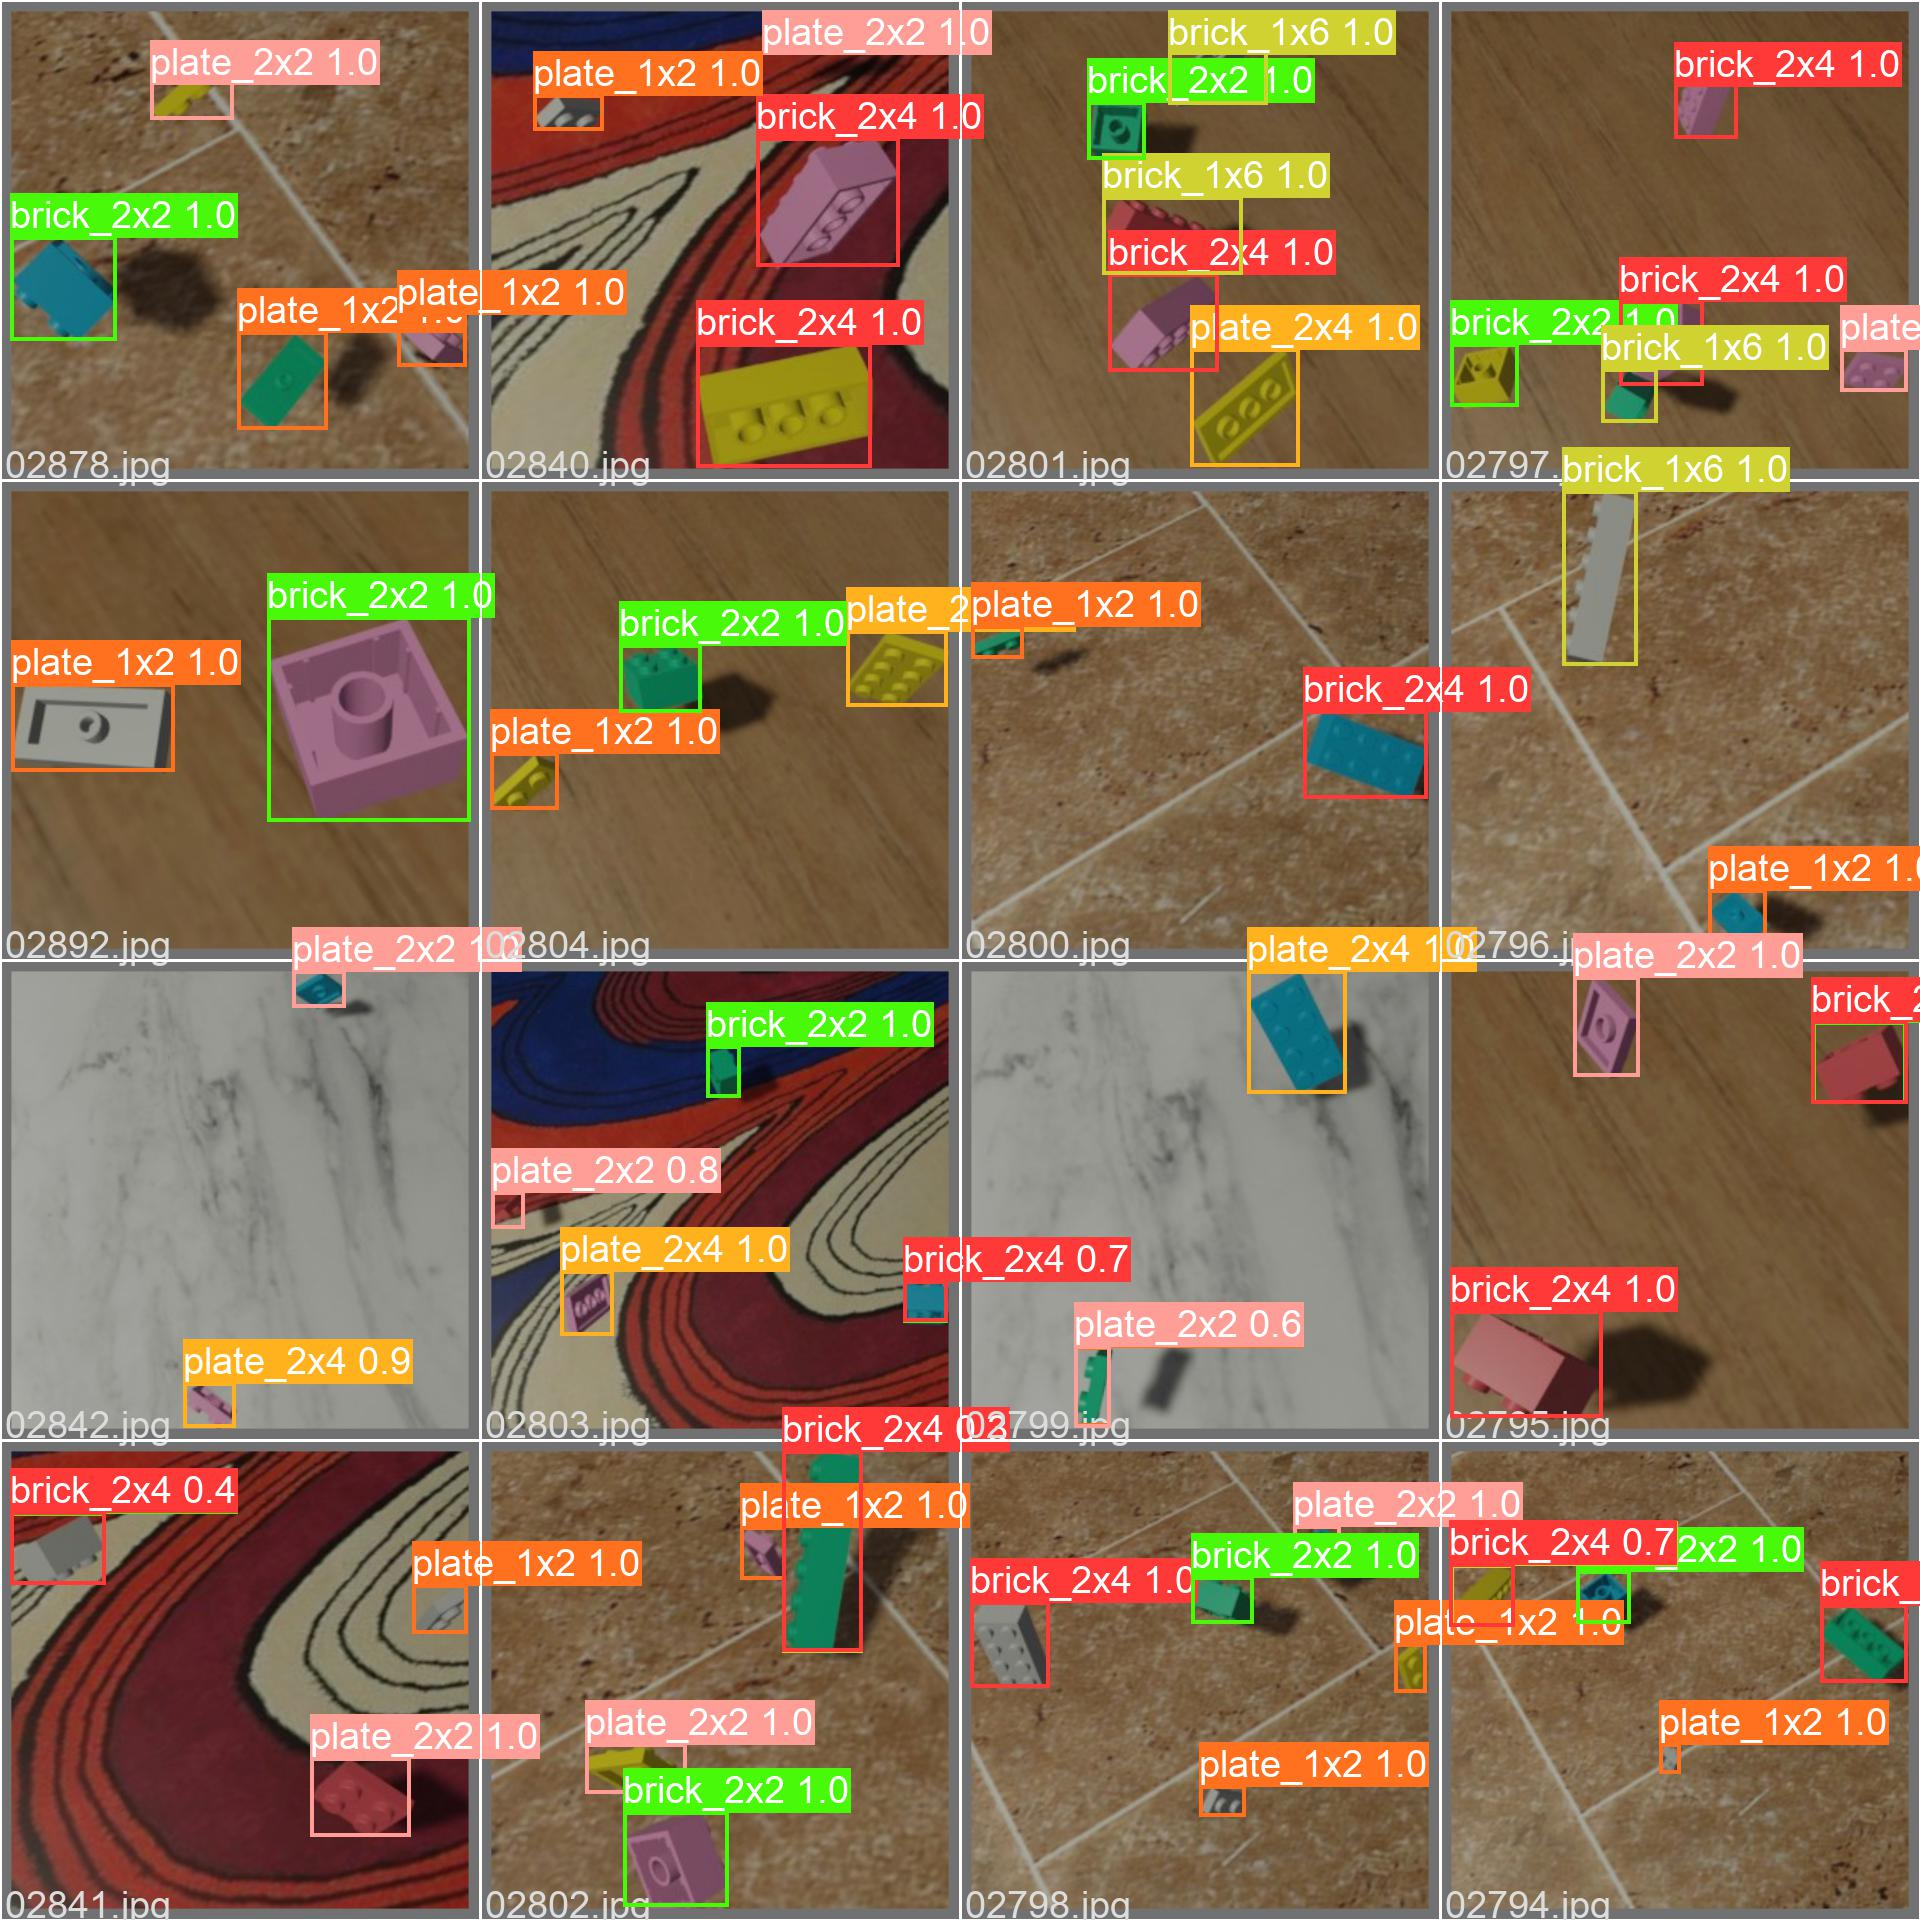

In [11]:
display.Image(filename='runs/train/exp/val_batch2_pred.jpg', width=1000)

Yes, I'm still astonished at how certain it is.

# Detect / Validate

Now we have trained our custom model, we can use it to detect legos in test images and videos.

Note 1: The command is set up to use the custom model i have trained in advance and provided through GitHub. If you want to use your own trained model, you will need to change the 'exp' part of the commands to use your training run ('exp2' for example) or uploaded model.

Note 2: The command is set up to detect in the images and videos i have selected and provided through GitHub. If you want to use your own images or videos, you will need to upload your own images or videos to the 'data/images' or 'data/videos' folder and change the commands to use your test files. You will also need to change the 'display.Image' command to suit your files.

In [19]:
# Detect legos in test images with our custom trainded YOLOv5 model
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.9 --source data/images

detect: weights=['runs/train/exp/weights/best.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.9, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 43bd979 Python-3.7.13 torch-1.11.0+cu113 CPU

Fusing layers... 
Model summary: 290 layers, 20873139 parameters, 0 gradients
image 1/6 /content/yolov5-custom_lego_dataset-2022-06-15/data/images/lego 1x2 plate.jpg: 640x416 1 brick_2x4, 2 plate_1x2s, Done. (0.746s)
image 2/6 /content/yolov5-custom_lego_dataset-2022-06-15/data/images/lego 1x6 brick.jpg: 640x416 3 brick_1x6s, Done. (0.772s)
image 3/6 /content/yolov5-custom_lego_dataset-2022-06-15/data/images/lego 2x2 brick.jpg: 640x416 3 brick_2x4s, 12 brick_2x2s, Done. (0.703s)
image 4/6

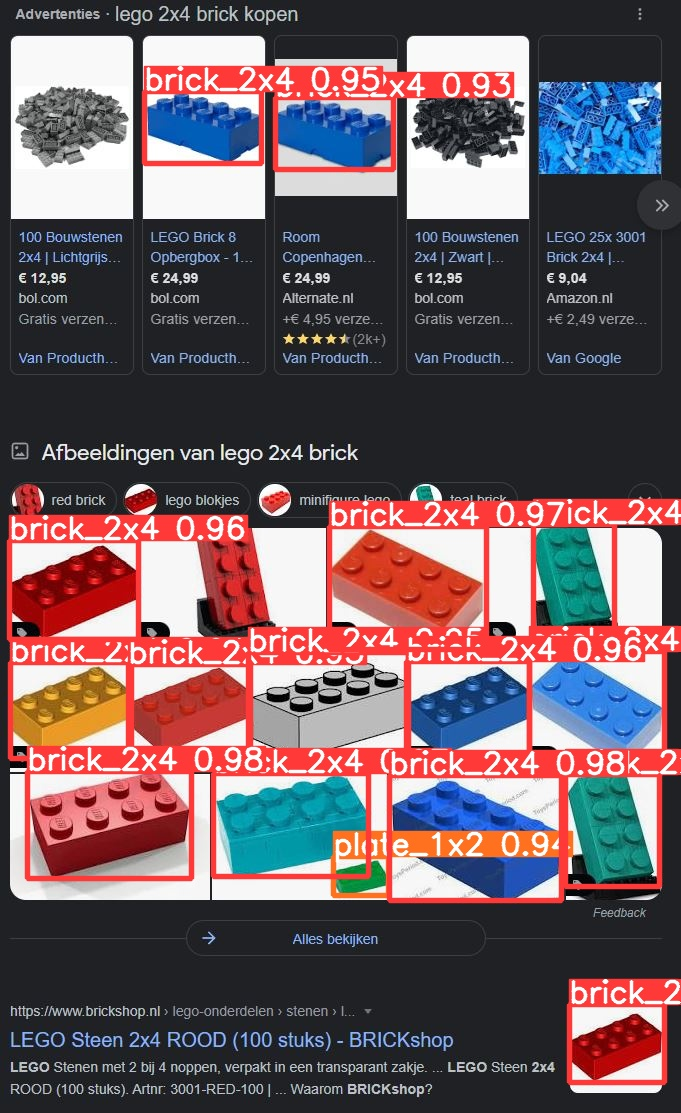

In [20]:
# Show the image results
display.Image(filename='runs/detect/exp/lego 2x4 brick.jpg', width=600)

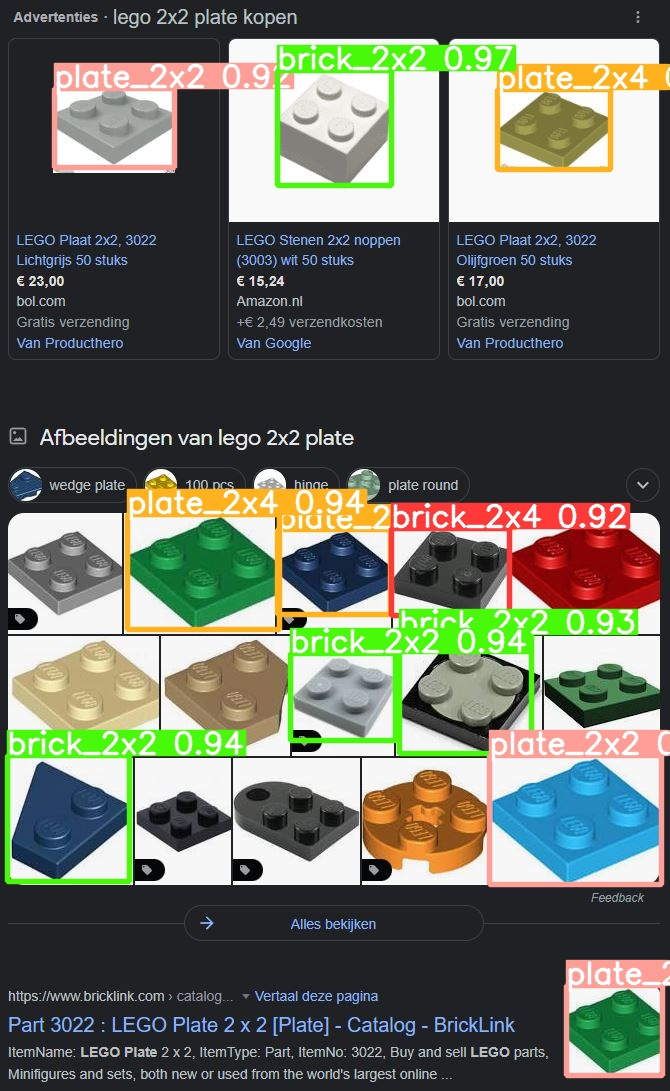

In [21]:
display.Image(filename='runs/detect/exp/lego 2x2 plate.jpg', width=600)

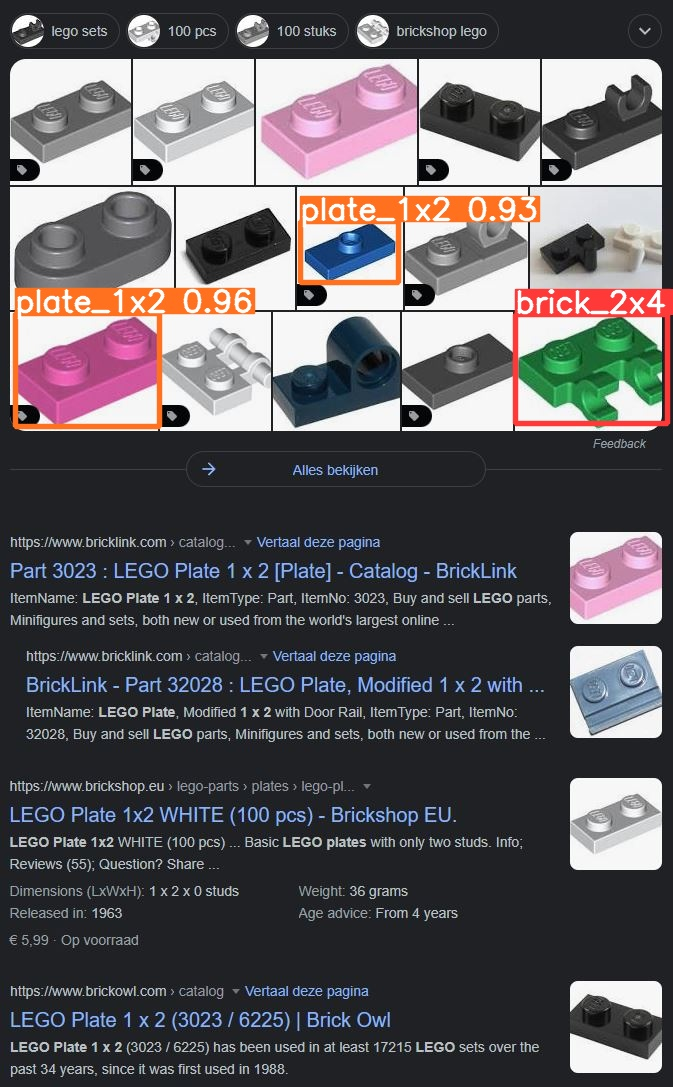

In [22]:
display.Image(filename='runs/detect/exp/lego 1x2 plate.jpg', width=600)

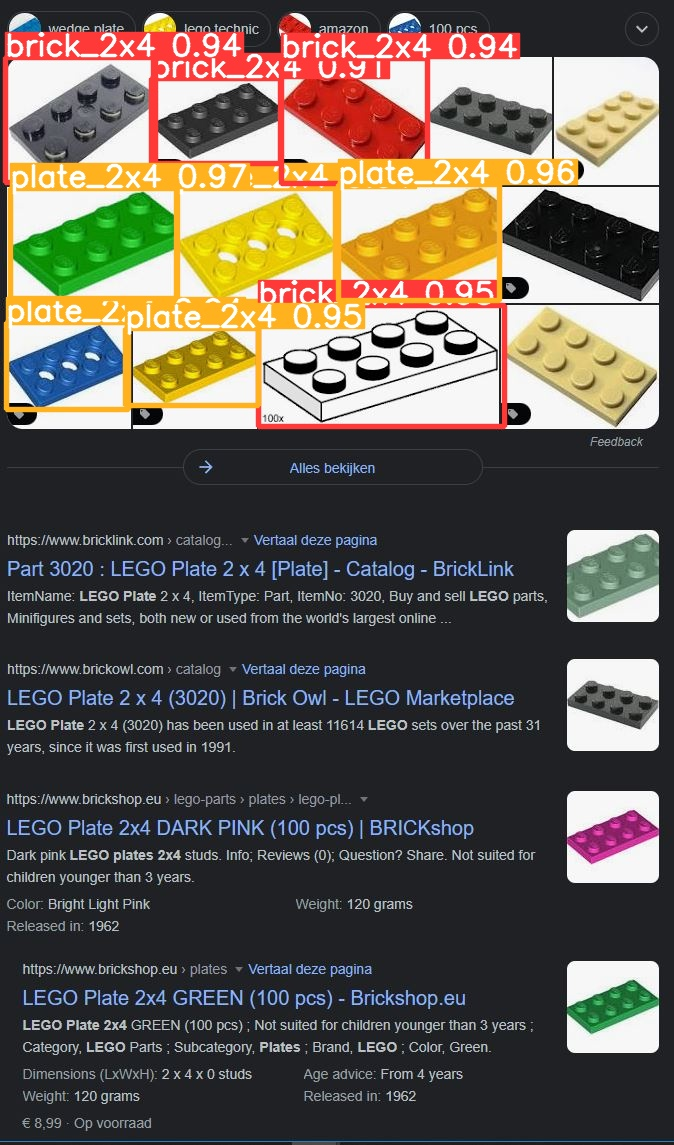

In [23]:
display.Image(filename='runs/detect/exp/lego 2x4 plate.jpg', width=600)

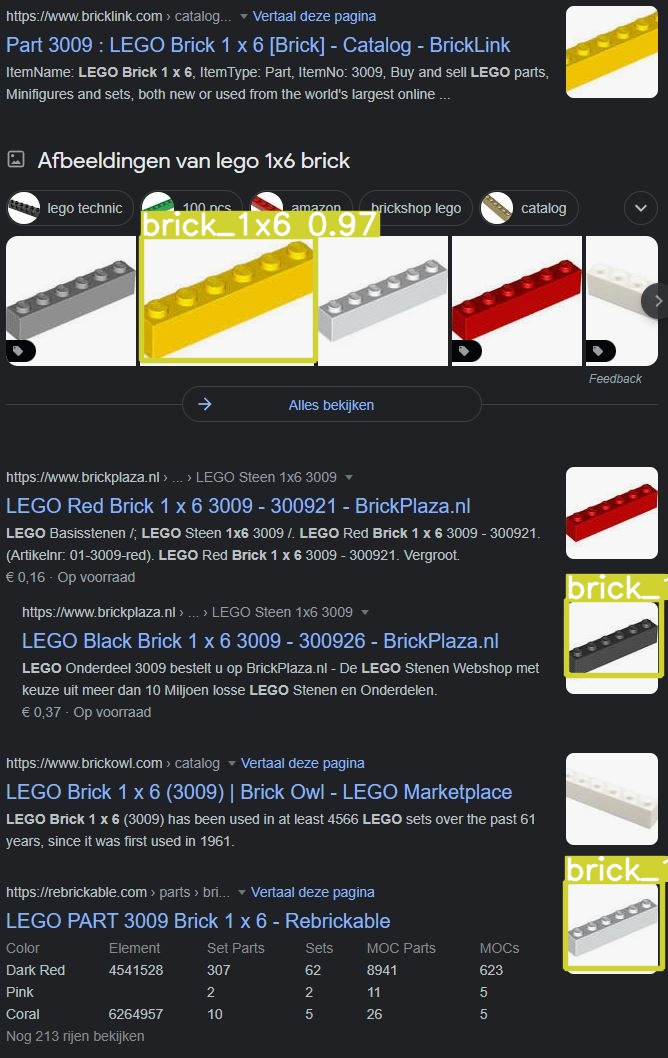

In [24]:
display.Image(filename='runs/detect/exp/lego 1x6 brick.jpg', width=600)

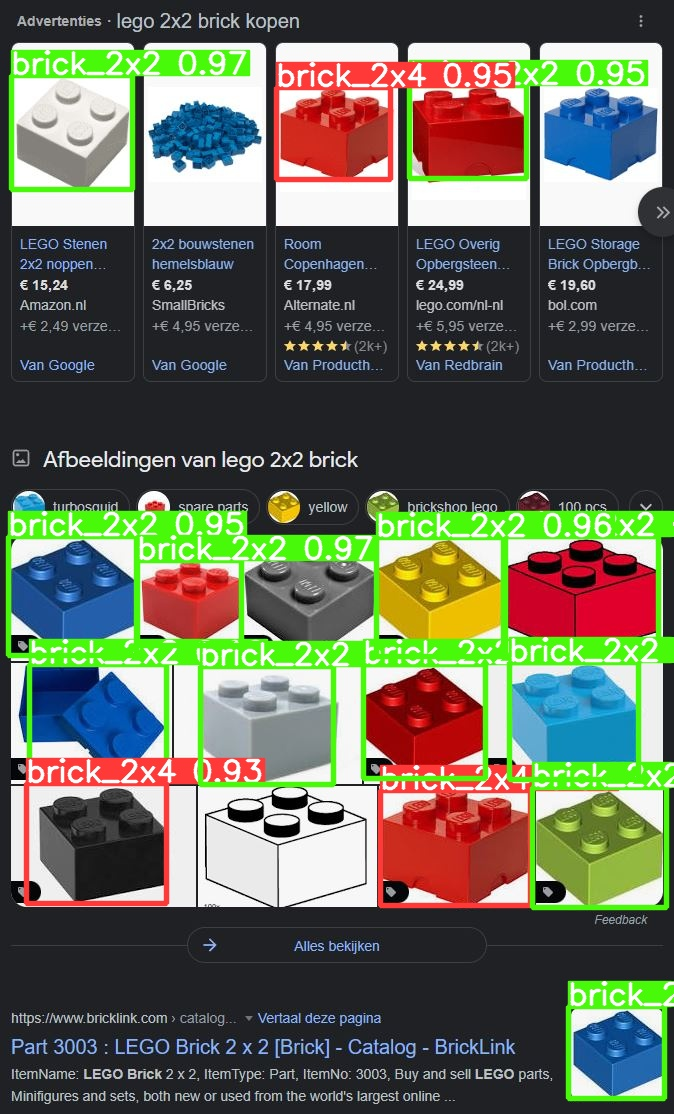

In [25]:
display.Image(filename='runs/detect/exp/lego 2x2 brick.jpg', width=600)

In [ ]:
# Detect legos in test videos with our custom trainded YOLOv5 model
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.9 --source data/videos

In [ ]:
# To view the video results you can download the files from the 'data/runs/exp' folder, they will have the following names:
# - 'LEGO Colors & the 2x4 Brick Collecting Trend_Trim2.mp4'
# - 'LEGO Colors & the 2x4 Brick Collecting Trend_Trim3.mp4'
# - 'LEGO Colors & the 2x4 Brick Collecting Trend_Trim4.mp4'

# Conclusion

Sadly, here we can see that our trained YOLOv5 model doesn't work that great... Even thought it had such a high confidence and recall. 

This probably has to do with the fact that the YOLOv5 model is made to work with far larger and more variable dataset. <- https://github.com/ultralytics/yolov5/issues/5851 (recommended: 1500 images per class, 10.000 instances per class).

To further elaborate on that, our test images don't really look anything like the training images and are pretty complex. So it just doesn't know what to do with it.

# Appendix

Lego dataset used to train our custom YOLOv5 model.

Original dataset:

Name:     Synthetic Lego brick dataset for object detection

Webpage:  https://www.kaggle.com/datasets/mantasgr/synthetic-lego-brick-dataset-for-object-detection 

Author:   Mantas Gribulis

Code (Python script) used to convert the VOC '.xml' files of the dataset to (usable by YOLOv5) '.txt' files.

Convertion tool:

Name:     Convert PascalVOC Annotations to YOLO

Website:  https://gist.github.com/Amir22010/a99f18ca19112bc7db0872a36a03a1ec

Author:   Amir22010, forked from myounus96

In [ ]:
import glob
import os
import pickle
import xml.etree.ElementTree as ET
from os import listdir, getcwd
from os.path import join

dirs = ['org']
classes = ['brick_2x4', 'plate_2x2', 'plate_1x2', 'plate_2x4', 'brick_1x6', 'brick_2x2']

def getImagesInDir(dir_path):
    image_list = []
    for filename in glob.glob(dir_path + '/*.jpg'):
        image_list.append(filename)

    return image_list

def convert(size, box):
    dw = 1./(size[0])
    dh = 1./(size[1])
    x = (box[0] + box[1])/2.0 - 1
    y = (box[2] + box[3])/2.0 - 1
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    return (x,y,w,h)

def convert_annotation(dir_path, output_path, image_path):
    basename = os.path.basename(image_path)
    basename_no_ext = os.path.splitext(basename)[0]

    in_file = open(dir_path + '/' + basename_no_ext + '.xml')
    out_file = open(output_path + basename_no_ext + '.txt', 'w')
    tree = ET.parse(in_file)
    root = tree.getroot()
    size = root.find('size')
    w = int(size.find('width').text)
    h = int(size.find('height').text)

    for obj in root.iter('object'):
        difficult = obj.find('difficult').text
        cls = obj.find('name').text
        #if cls not in classes or int(difficult)==1:
        #    continue
        cls_id = classes.index(cls)
        xmlbox = obj.find('bndbox')
        b = (float(xmlbox.find('xmin').text), float(xmlbox.find('xmax').text), float(xmlbox.find('ymin').text), float(xmlbox.find('ymax').text))
        bb = convert((w,h), b)
        out_file.write(str(cls_id) + " " + " ".join([str(a) for a in bb]) + '\n')

cwd = getcwd()

for dir_path in dirs:
    full_dir_path = cwd + '/' + dir_path
    output_path = full_dir_path +'/yolo/'

    if not os.path.exists(output_path):
        os.makedirs(output_path)

    image_paths = getImagesInDir(full_dir_path)
    list_file = open(full_dir_path + '.txt', 'w')

    for image_path in image_paths:
        list_file.write(image_path + '\n')
        convert_annotation(full_dir_path, output_path, image_path)
    list_file.close()

    print("Finished processing: " + dir_path)